# Exploratory Data Analysis on High Ranked Dataset 

First step was to scrape potentially insightful data on the top 50 ranked players from each region in Episode 9 Act 3. I was able to collect 292/300 of those players (variability in the tracker.gg website). 

### I. Data Re-formatting

In [1]:
import pandas as pd
import numpy as np
from clean_label import standardize_column_names, time_to_seconds, clean_numeric_column

In [2]:
top_players = pd.read_csv("data/scraped_player_stats_3.csv")
top_players.head() # uncleaned data

IGN region rank_rating Combat_ability_1_casts  \
0        SEN nightz#aim     na       1,126                  6,102   
1  the chosen one#mØØda     na       1,118                  7,314   
2        humblegod#1122     na       1,076                  1,451   
3     ENVY POPPIN#GUIDE     na       1,066                  2,061   
4         KRÜ Shyy#Flow     na       1,040                  1,197   

   Combat_ability_1_casts/match  Combat_ability_1_casts/round  \
0                         15.07                           0.7   
1                         10.85                           0.5   
2                          6.05                           0.3   
3                         10.41                           0.5   
4                         14.96                           0.7   

  Combat_ability_2_casts  Combat_ability_2_casts/match  \
0                 11,629                         28.71   
1                 13,763                         20.42   
2                  9,092                         37.88   
3                  4,621                         23.34   
4                  2,340                         29.25   

   Combat_ability_2_casts/round  Combat_aces  ...  Defense_round_win  \
0                           1.4         24.0  ...              58.3%   
1                           1.0         51.0  ...              55.5%   
2                           1.8          8.0  ...              57.5%   
3                           1.1          5.0  ...              58.0%   
4                           1.4          8.0  ...              61.9%   

  Defense_rounds_lost  Defense_rounds_played  Defense_rounds_survived  \
0               1,784                  4,280                    1,413   
1               3,125                  7,017                    1,909   
2               1,049                  2,469                      850   
3                 875                  2,084                      649   
4                 333                    874                      364   

  Defense_rounds_traded  Defense_rounds_won  Defense_score  \
0                   706               2,496      1,172,918   
1                 1,124               3,892      1,838,132   
2                   474               1,420        671,537   
3                   355               1,209        543,547   
4                   122                 541        268,898   

   Uncategorized_peak_rating  Uncategorized_performance_score  \
0                      1,173                            910.0   
1                      1,118                            813.0   
2                      1,076                            929.0   
3                      1,111                            887.0   
4                      1,184                            981.0   

   Uncategorized_rating  
0                 1,126  
1                 1,118  
2                 1,076  
3                 1,066  
4                 1,040  

[5 rows x 156 columns]

In [3]:
# Standardize column headers
clean_players = standardize_column_names(top_players)

In [4]:
# Convert string time columns to float (seconds) (e.g. "01m 23s" -> 83)
clean_players["game_matches_duration"] = clean_players["game_matches_duration"].apply(time_to_seconds)
clean_players["game_rounds_duration"] = clean_players["game_rounds_duration"].apply(time_to_seconds)
clean_players["combat_time_played"] = clean_players["combat_time_played"].str.replace("h", "").astype(float)

In [5]:
# Convert incorrect string values (e.g. "1,234" -> 1234 or "58.3%" -> 0.583)
non_numeric_cols = ["ign", "region"]  
numeric_cols = [col for col in clean_players.columns if col not in non_numeric_cols]

for col in numeric_cols:
    clean_players[col] = clean_numeric_column(clean_players[col])

In [6]:
# Drop rows with missing values
print(f"Original number of rows: {len(clean_players.index)}")
clean_players = clean_players.dropna(axis=0)
print(f"Ending number of rows: {len(clean_players.index)}")

Original number of rows: 295
Ending number of rows: 292


In [7]:
# Cleaned data
clean_players.head()

ign region  rank_rating  combat_ability_1_casts  \
0        SEN nightz#aim     na         1126                  6102.0   
1  the chosen one#mØØda     na         1118                  7314.0   
2        humblegod#1122     na         1076                  1451.0   
3     ENVY POPPIN#GUIDE     na         1066                  2061.0   
4         KRÜ Shyy#Flow     na         1040                  1197.0   

   combat_ability_1_casts_per_match  combat_ability_1_casts_per_round  \
0                             15.07                               0.7   
1                             10.85                               0.5   
2                              6.05                               0.3   
3                             10.41                               0.5   
4                             14.96                               0.7   

   combat_ability_2_casts  combat_ability_2_casts_per_match  \
0                 11629.0                             28.71   
1                 13763.0                             20.42   
2                  9092.0                             37.88   
3                  4621.0                             23.34   
4                  2340.0                             29.25   

   combat_ability_2_casts_per_round  combat_aces  ...  defense_round_win  \
0                               1.4         24.0  ...              0.583   
1                               1.0         51.0  ...              0.555   
2                               1.8          8.0  ...              0.575   
3                               1.1          5.0  ...              0.580   
4                               1.4          8.0  ...              0.619   

   defense_rounds_lost  defense_rounds_played  defense_rounds_survived  \
0               1784.0                 4280.0                   1413.0   
1               3125.0                 7017.0                   1909.0   
2               1049.0                 2469.0                    850.0   
3                875.0                 2084.0                    649.0   
4                333.0                  874.0                    364.0   

   defense_rounds_traded  defense_rounds_won  defense_score  \
0                  706.0              2496.0      1172918.0   
1                 1124.0              3892.0      1838132.0   
2                  474.0              1420.0       671537.0   
3                  355.0              1209.0       543547.0   
4                  122.0               541.0       268898.0   

   uncategorized_peak_rating  uncategorized_performance_score  \
0                     1173.0                            910.0   
1                     1118.0                            813.0   
2                     1076.0                            929.0   
3                     1111.0                            887.0   
4                     1184.0                            981.0   

   uncategorized_rating  
0                1126.0  
1                1118.0  
2                1076.0  
3                1066.0  
4                1040.0  

[5 rows x 156 columns]

### II. Distribution Analysis Per Region

Key features to look at:
 1. RR
 2. ACS
 3. KAST
 4. Damage Delta?
 5. Damage per match
 6. ESR (entry success rate)
 7. First bloods per match
 8. Headshot percentage (headshot)
 9. KD ratio
 10. KDA ratio
 11. Kills per match
 12. Time played
 13. Round win rate
 14. Game win rate

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

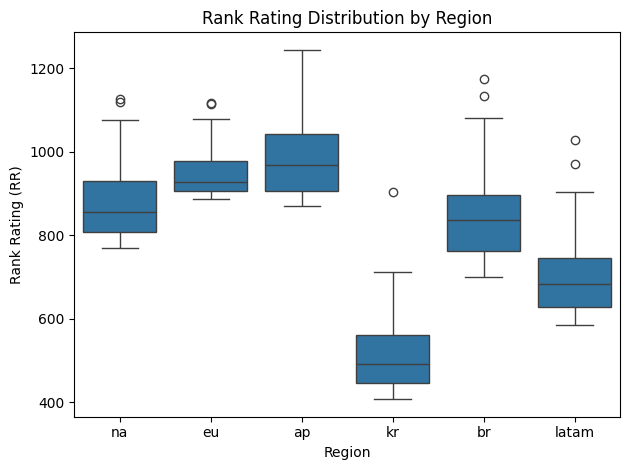

In [9]:
# Side by side box plots of RR distribution
#plt.figure(figsize=(10, 6))

sns.boxplot(data=clean_players, x="region", y="rank_rating")

plt.title("Rank Rating Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Rank Rating (RR)")
plt.tight_layout()
plt.show()


In [10]:
clean_players.groupby("region")["rank_rating"].describe()

count        mean         std    min     25%    50%      75%     max
region                                                                      
ap       50.0  982.240000   84.445505  870.0  905.75  969.0  1041.50  1244.0
br       49.0  848.204082  109.348636  699.0  762.00  837.0   897.00  1174.0
eu       49.0  951.673469   61.009695  887.0  907.00  927.0   978.00  1117.0
kr       48.0  519.937500   99.775153  407.0  445.25  491.5   561.75   903.0
latam    47.0  705.659574  103.309429  586.0  628.00  684.0   745.00  1029.0
na       49.0  881.428571   95.693303  770.0  808.00  856.0   930.00  1126.0

Note how Korea's distribution of RR is significantly lower than the rest. Wonder why that might be?  

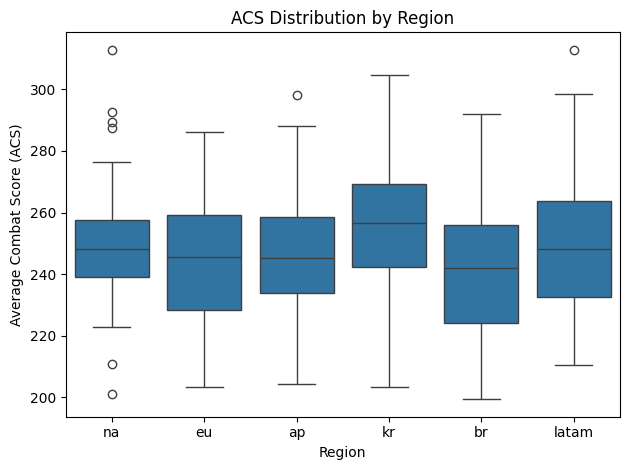

In [11]:
# acs by region?
sns.boxplot(data=clean_players, x="region", y="combat_acs")
plt.title("ACS Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Average Combat Score (ACS)")
plt.tight_layout()
plt.show()

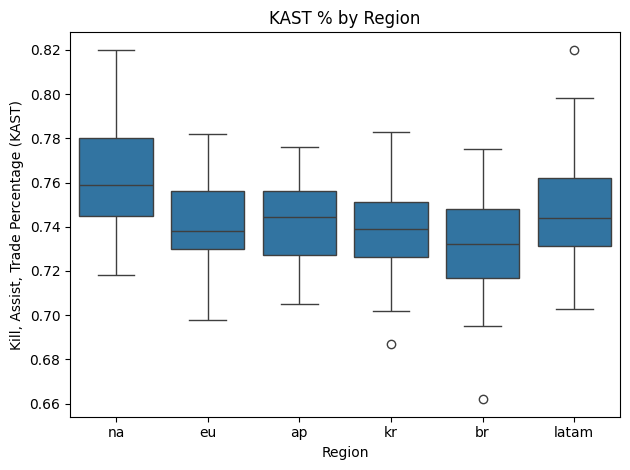

In [12]:
# kast by region?
sns.boxplot(data=clean_players, x="region", y="combat_kast")
plt.title("KAST % by Region")
plt.xlabel("Region")
plt.ylabel("Kill, Assist, Trade Percentage (KAST)")
plt.tight_layout()
plt.show()

Top NA players generally have a higher KAST than other regions. Interestingly, Brazil has an outlier with a significantly low KAST...

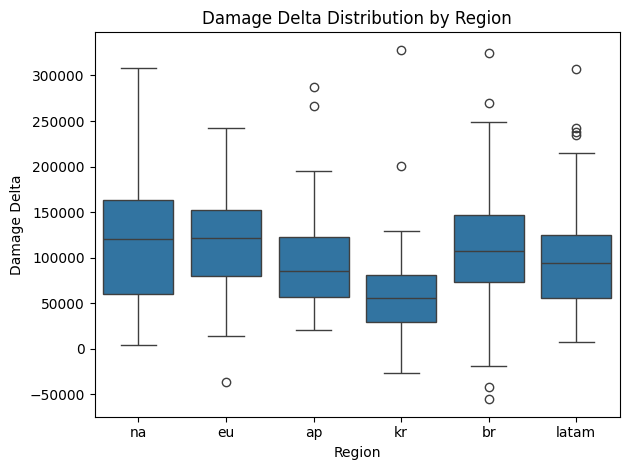

In [13]:
# damage delta vs region?
sns.boxplot(data=clean_players, x="region", y="combat_damage_delta_delta")
plt.title("Damage Delta Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Damage Delta")
plt.tight_layout()
plt.show()

Korea again shows a distinct difference in terms of damage delta as they did with RR while having a relatively similar KAST. Might imply that Korean ranked games are more tactical/team focused rather than individual fragging heavy. Also, EU, Korea, Brazil, and maybe LATAM show some of their top 50 players having negative damage delta while the other regions primarily have players with positive damage deltas. These players win ranked games without crazy fragging, or do they just die a lot and still have impact? (Clove).  

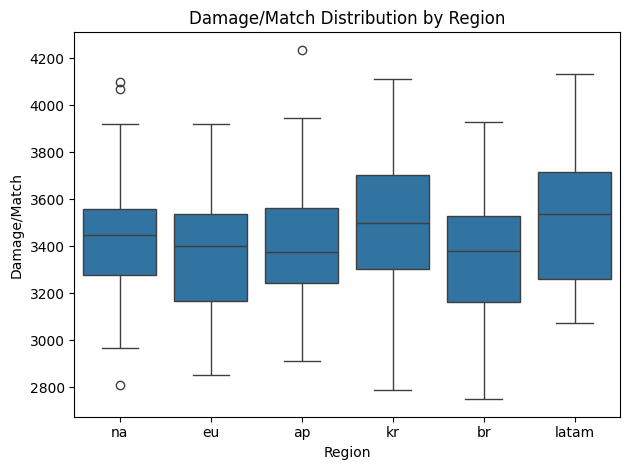

In [14]:
sns.boxplot(data=clean_players, x="region", y="combat_damage_per_match")
plt.title("Damage/Match Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Damage/Match")
plt.tight_layout()
plt.show()

Going back to the last note, Korea and Brazil show particularly low damage/match stats among their top players. Are these the same people with low damage deltas?

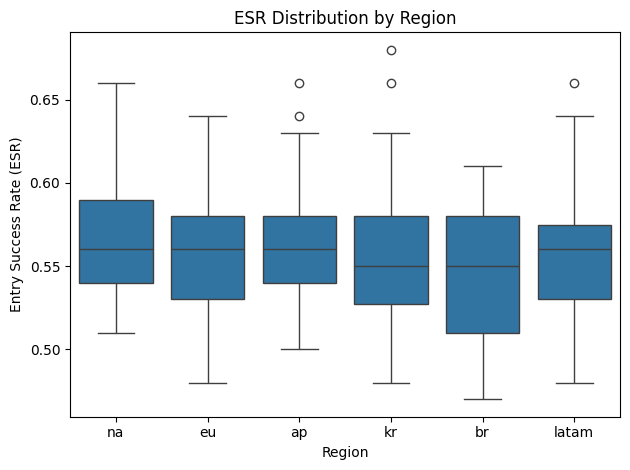

In [15]:
sns.boxplot(data=clean_players, x="region", y="combat_esr")
plt.title("ESR Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Entry Success Rate (ESR)")
plt.tight_layout()
plt.show()

Entry success rate really just applies to duelists so looking at the distribution doesn't mean too much, but Korea has a couple demons. 

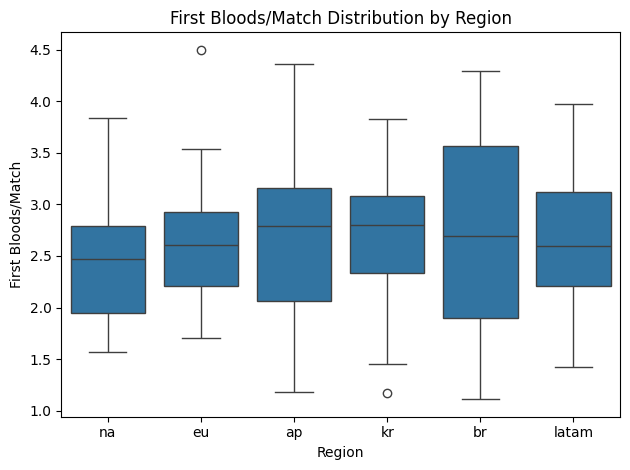

In [16]:
sns.boxplot(data=clean_players, x="region", y="combat_first_bloods_per_match")
plt.title("First Bloods/Match Distribution by Region")
plt.xlabel("Region")
plt.ylabel("First Bloods/Match")
plt.tight_layout()
plt.show()

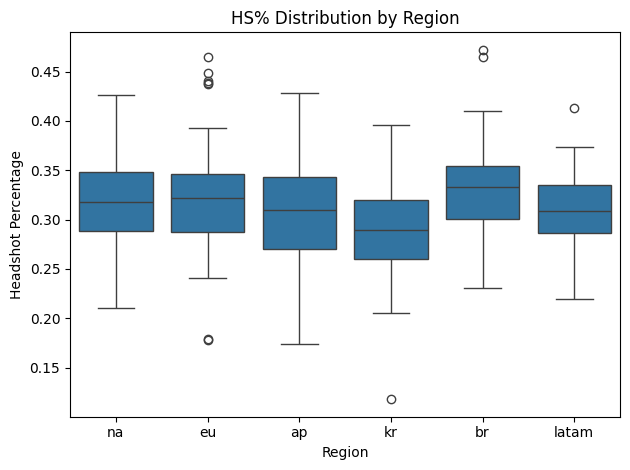

In [17]:
sns.boxplot(data=clean_players, x="region", y="combat_headshot")
plt.title("HS% Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Headshot Percentage")
plt.tight_layout()
plt.show()

Who tf in Korea has a <0.15 HS% that is in top 50? Wonder how that relates to win %. 

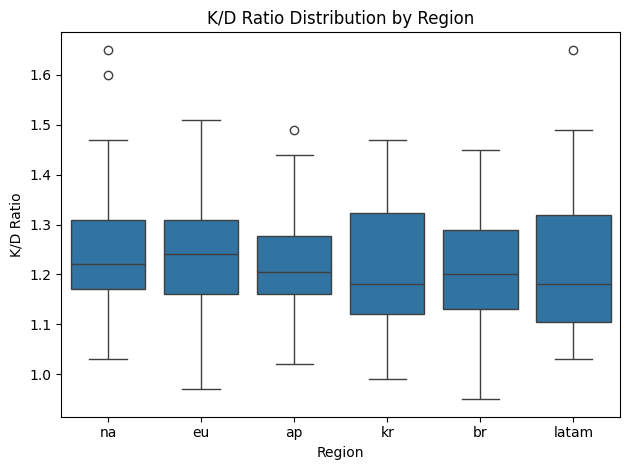

In [18]:
sns.boxplot(data=clean_players, x="region", y="combat_k_per_d_ratio")
plt.title("K/D Ratio Distribution by Region")
plt.xlabel("Region")
plt.ylabel("K/D Ratio")
plt.tight_layout()
plt.show()

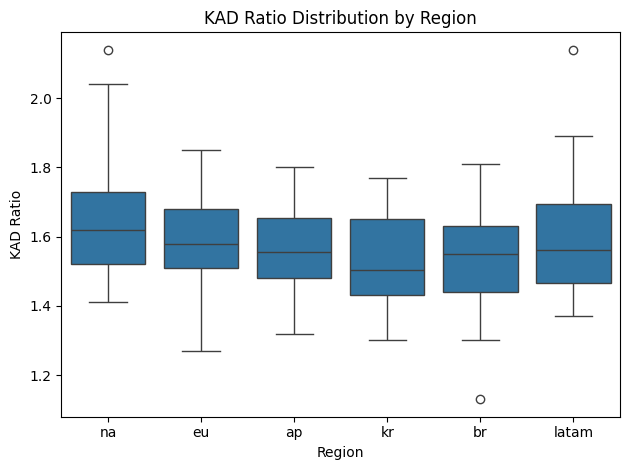

In [19]:
sns.boxplot(data=clean_players, x="region", y="combat_kad_ratio")
plt.title("KAD Ratio Distribution by Region")
plt.xlabel("Region")
plt.ylabel("KAD Ratio")
plt.tight_layout()
plt.show()

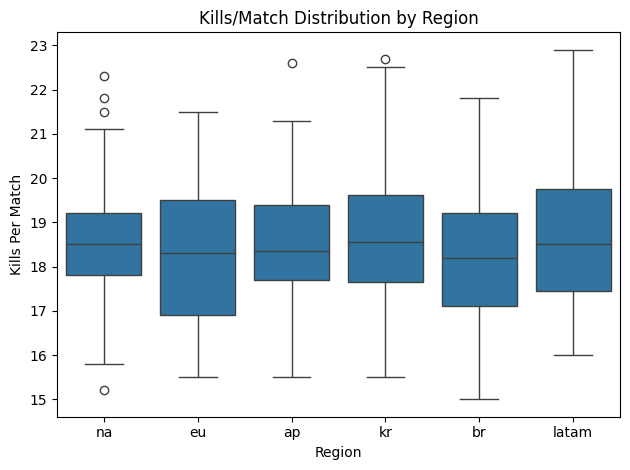

In [20]:
sns.boxplot(data=clean_players, x="region", y="combat_kills_per_match")
plt.title("Kills/Match Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Kills Per Match")
plt.tight_layout()
plt.show()

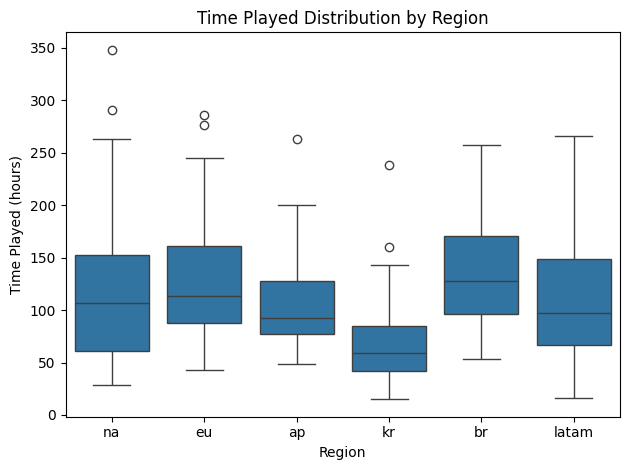

In [21]:
sns.boxplot(data=clean_players, x="region", y="combat_time_played")
plt.title("Time Played Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Time Played (hours)")
plt.tight_layout()
plt.show()

Koreans just don't play as much as the rest of the world. 

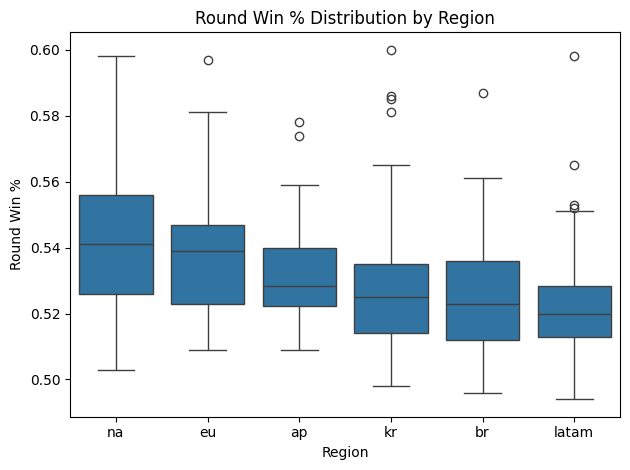

In [22]:
sns.boxplot(data=clean_players, x="region", y="game_round_win")
plt.title("Round Win % Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Round Win %")
plt.tight_layout()
plt.show()

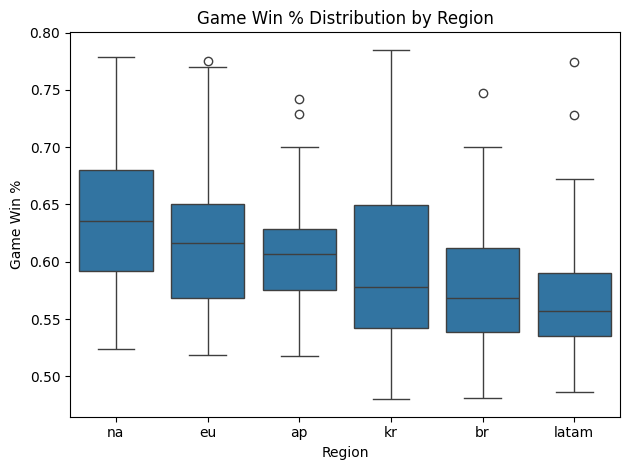

In [23]:
sns.boxplot(data=clean_players, x="region", y="game_win")
plt.title("Game Win % Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Game Win %")
plt.tight_layout()
plt.show()

In [24]:
clean_players.columns.to_list()

['ign',
 'region',
 'rank_rating',
 'combat_ability_1_casts',
 'combat_ability_1_casts_per_match',
 'combat_ability_1_casts_per_round',
 'combat_ability_2_casts',
 'combat_ability_2_casts_per_match',
 'combat_ability_2_casts_per_round',
 'combat_aces',
 'combat_acs',
 'combat_assists',
 'combat_assists_per_match',
 'combat_assists_per_round',
 'combat_clutch',
 'combat_clutches',
 'combat_clutches_1v1',
 'combat_clutches_1v2',
 'combat_clutches_1v3',
 'combat_clutches_1v4',
 'combat_clutches_lost_1v2',
 'combat_clutches_lost_1v3',
 'combat_clutches_lost_1v4',
 'combat_clutches_lost_1v5',
 'combat_damage',
 'combat_damage_delta_delta',
 'combat_damage_received',
 'combat_damage_per_match',
 'combat_damage_per_minute',
 'combat_damage_per_round',
 'combat_dddelta_per_round',
 'combat_dealt_bodyshots',
 'combat_dealt_headshots',
 'combat_dealt_legshots',
 'combat_deaths',
 'combat_deaths_per_match',
 'combat_deaths_per_round',
 'combat_defuses',
 'combat_disconnects',
 'combat_econ_rating

### III. Correlation Analysis and Filtering Low-Variance and High-Correlation Data

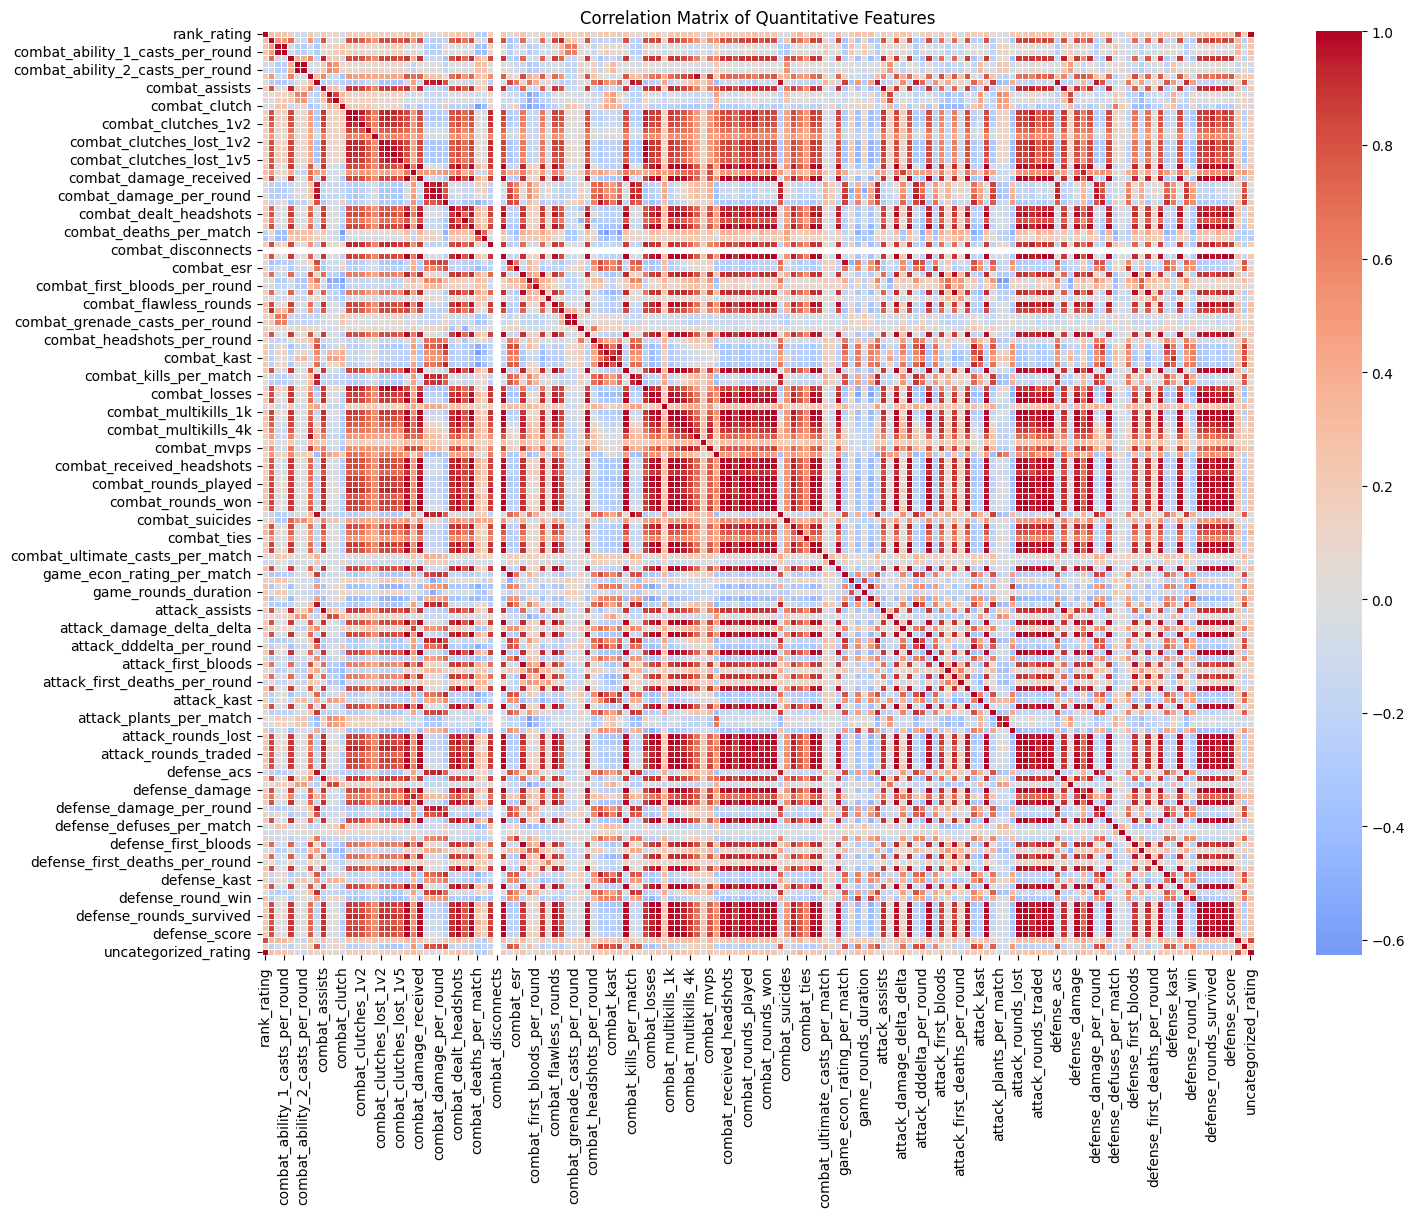

In [25]:
corr_matrix = clean_players.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Quantitative Features")
plt.show()

This is hard to look at! Let's break down the correlation matrix into a dataframe containing pairwise correlations in descending order. 

In [26]:
# Unstack the correlation matrix and reset as a Series
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]

# Drop self-correlations
corr_pairs = corr_pairs[corr_pairs["Feature 1"] != corr_pairs["Feature 2"]]

# Drop duplicate pairs (A,B) and (B,A)
corr_pairs["pair"] = corr_pairs.apply(lambda row: tuple(sorted([row["Feature 1"], row["Feature 2"]])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset="pair").drop(columns="pair")

# Sort by correlation strength
sorted_corr_pairs = corr_pairs.sort_values(by="Correlation", ascending=False)

sorted_corr_pairs.head()

Feature 1              Feature 2  Correlation
153             rank_rating   uncategorized_rating     1.000000
11668  combat_rounds_played   attack_rounds_played     0.999706
11696  combat_rounds_played  defense_rounds_played     0.999706
8703           combat_kills           combat_score     0.999627
22018         defense_kills          defense_score     0.999573

We have a lot of HIGHLY correlated variables that we can remove without losing too much information (literally rank_rating and uncategorized_rating are the same). Before we move onto that, let's see which variable correlated with RR the most!

In [27]:
rr_corrs = corr_matrix["rank_rating"].drop("rank_rating").sort_values(ascending=False)

In [28]:
rr_corrs.head(11) # top positive

uncategorized_rating          1.000000
uncategorized_peak_rating     0.835845
combat_thrifty_rounds         0.342964
combat_wins                   0.307400
combat_damage_delta_delta     0.303996
defense_damage_delta_delta    0.297250
combat_flawless_rounds        0.288583
combat_ability_1_casts        0.273133
game_win                      0.269406
game_round_win                0.263265
attack_rounds_survived        0.263104
Name: rank_rating, dtype: float64

In [29]:
rr_corrs.tail(10) # top negative

attack_plants_per_round            -0.073728
combat_clutch                      -0.079631
defense_defuses_per_match          -0.086415
defense_defuses_per_round          -0.094260
combat_ability_2_casts_per_match   -0.098681
combat_ability_2_casts_per_round   -0.101492
combat_ultimate_casts_per_round    -0.111359
combat_deaths_per_match            -0.216655
combat_deaths_per_round            -0.280430
combat_disconnects                       NaN
Name: rank_rating, dtype: float64

Next, we will remove low-variance variables and highly correlated variables. 

Low variance means they don't change much from player to player, as in every player has approximately the same value for this stat.

Highly correlated variables are variables that are so related to each other, removing one doesn't hurt our analysis because the other can simply take its place (i.e. these variables don't add any value to our analysis).

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Separate categorical and quantitative columns
cat_cols = ["ign", "region"]
quan_players = clean_players.drop(columns=cat_cols)

# Standardize the quantitative data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quan_players)
scaled_df = pd.DataFrame(scaled_data, columns=quan_players.columns)

In [31]:
# Find low-variance features
selector = VarianceThreshold(threshold=0.01)  # adjust threshold if needed
selector.fit(scaled_df)
low_variance_cols = scaled_df.columns[~selector.get_support()].tolist()

In [32]:
low_variance_cols

['combat_disconnects']

Disconnects are rare and don't mean anything w.r.t. ranked success! (duh)

In [33]:
# Identify highly correlated columns (correlation > 0.95)
corr_matrix = scaled_df.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
high_corr_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

# Want to keep at least one column from each highly correlated group
to_drop = set()
for col in upper_triangle.columns:
    upper_tri_features = upper_triangle.index[upper_triangle[col] > 0.95].tolist()
    if upper_tri_features:
        # Drop only the current column (col), keep the first in each group
        to_drop.add(col)

In [34]:
list(to_drop)

['combat_kills_per_match',
 'combat_losses',
 'defense_rounds_lost',
 'combat_grenade_casts_per_round',
 'defense_rounds_won',
 'combat_time_played',
 'attack_damage_per_round',
 'combat_damage_per_round',
 'attack_deaths_per_round',
 'defense_headshots',
 'combat_headshots',
 'combat_econ_rating',
 'combat_received_bodyshots',
 'combat_clutches_1v2',
 'combat_rounds_lost',
 'attack_damage_received',
 'combat_first_deaths',
 'combat_rounds_played',
 'combat_dealt_headshots',
 'combat_multikills_2k',
 'defense_score',
 'combat_kills',
 'combat_multikills_1k',
 'combat_ability_1_casts_per_round',
 'defense_first_bloods',
 'attack_rounds_lost',
 'uncategorized_rating',
 'combat_damage_per_match',
 'game_econ_rating_per_match',
 'defense_rounds_played',
 'combat_clutches_lost_1v3',
 'combat_matches_played',
 'combat_deaths',
 'combat_mvps',
 'combat_last_deaths',
 'combat_clutches_lost_1v5',
 'combat_rounds_won',
 'attack_first_bloods',
 'attack_rounds_played',
 'attack_score',
 'defense_a

In [35]:
# Drop low-variance columns from your standardized data
cols_to_drop = list(set(low_variance_cols).union(to_drop))
filtered_df = scaled_df.drop(columns=cols_to_drop)

In [36]:
filtered_df.head()

rank_rating  combat_ability_1_casts  combat_ability_1_casts_per_match  \
0     1.683617                2.299408                          0.805977   
1     1.640001                3.080026                         -0.352048   
2     1.411021               -0.696180                         -1.669234   
3     1.356501               -0.303295                         -0.472790   
4     1.214751               -0.859775                          0.775792   

   combat_ability_2_casts  combat_ability_2_casts_per_match  combat_aces  \
0                1.964632                          0.501655     2.319682   
1                2.629759                         -0.844164     6.437757   
2                1.173896                          1.990335    -0.120659   
3               -0.219631                         -0.370124    -0.578223   
4               -0.930576                          0.589320    -0.120659   

   combat_acs  combat_assists  combat_assists_per_match  \
0    0.717425        1.646807                 -0.057619   
1    0.348166        2.464855                 -1.373527   
2    0.799482        0.652664                  0.882315   
3   -0.098591        0.489374                  1.728255   
4    2.044020       -0.994637                  0.694328   

   combat_assists_per_round  ...  defense_defuses_per_match  \
0                  0.832600  ...                   0.143496   
1                 -0.941993  ...                  -1.002729   
2                  0.832600  ...                  -0.748012   
3                  0.832600  ...                  -0.111220   
4                  0.832600  ...                   0.143496   

   defense_defuses_per_round  defense_esr  defense_first_bloods_per_round  \
0                  -0.131991     0.556767                       -0.689019   
1                  -0.131991    -0.115035                        1.451338   
2                  -0.131991     1.004635                       -0.689019   
3                  -0.131991    -0.786837                       -0.689019   
4                  -0.131991     1.900372                       -0.689019   

   defense_first_deaths_per_round  defense_kast  defense_kills_per_round  \
0                        0.137839      0.886629                 1.136691   
1                        0.137839     -1.017652                -0.032019   
2                        0.137839      1.492536                 1.136691   
3                        0.137839      0.670233                -0.032019   
4                        0.137839      2.964025                 2.305402   

   defense_round_win  uncategorized_peak_rating  \
0           1.091039                   1.030312   
1          -0.081301                   0.781820   
2           0.756085                   0.592063   
3           0.965431                   0.750194   
4           2.598334                   1.080010   

   uncategorized_performance_score  
0                         0.827271  
1                        -0.073391  
2                         1.003689  
3                         0.613712  
4                         1.486519  

[5 rows x 73 columns]

### IV. Feature Importance when Predicting RR

Here, I will train models to predict RR using the processed data from before. I'm not necessarily looking to build a high-performing rank predictor, rather, looking to extract insights from these models to see which variables they deduce are important for rank improvement. The models to be trained are:
1. Lasso (L1) Regression
2. Ridge (L2) Regression
3. Random Forest
4. XGBoost

*Note for my Random Forest and XGBoost models, I will be using GridSearchCV to do some light hyperparameter optimization to make sure I get the best models. Even though I'm not looking for high-performance, the better they perform the more valuable the insights they can provide with their feature importances.

##### RR as Target Variable

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# 1. Define X and y
X = filtered_df.drop(["rank_rating", "uncategorized_peak_rating", "game_win", "game_round_win", "defense_round_win", "attack_round_win", "uncategorized_performance_score"], axis=1)
y = filtered_df["rank_rating"]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420) #blazeit


In [38]:
# Lasso (L1)
lasso = LassoCV(cv=5, random_state=420)
lasso.fit(X_train, y_train)

lasso_importance = pd.Series(lasso.coef_, index=X.columns).sort_values(key=abs, ascending=False)

/opt/miniconda3/envs/valorant/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12710286152619688, tolerance: 0.018921723459735595
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/valorant/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5462368822350996, tolerance: 0.018921723459735595
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/valorant/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.908828819411589, tolerance: 0.018921723459735595
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/valorant/lib/

In [39]:
# Ridge (L2)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)

ridge_importance = pd.Series(ridge.coef_, index=X.columns).sort_values(key=abs, ascending=False)

In [40]:
# Random Forest
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
rf_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

In [41]:
# XGB
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1]
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), xgb_params, cv=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
xgb_importance = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

In [42]:
# Test models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    print(f"📊 {name} Test Performance:")
    print(f"  R²:   {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print("-" * 40)

evaluate_model(lasso, X_test, y_test, "LASSO")
evaluate_model(ridge, X_test, y_test, "Ridge")
evaluate_model(best_rf, X_test, y_test, "Random Forest")
evaluate_model(best_xgb, X_test, y_test, "XGBoost")

📊 LASSO Test Performance:
  R²:   0.4331
  RMSE: 0.79
  MAE:  0.64
----------------------------------------
📊 Ridge Test Performance:
  R²:   0.4733
  RMSE: 0.76
  MAE:  0.63
----------------------------------------
📊 Random Forest Test Performance:
  R²:   0.2705
  RMSE: 0.90
  MAE:  0.68
----------------------------------------
📊 XGBoost Test Performance:
  R²:   0.3092
  RMSE: 0.87
  MAE:  0.68
----------------------------------------


Our best model (Ridge Regression) seem to capture about 47% of the variability in rank rating among players in our dataset.

We will use the SHapley Additive exPlanations (SHAP) framework to better understand feature importances. This is superior to simply looking at the feature importances/coefficients from each model because it accounts for non-linear interactions between the variables. 

/opt/miniconda3/envs/valorant/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


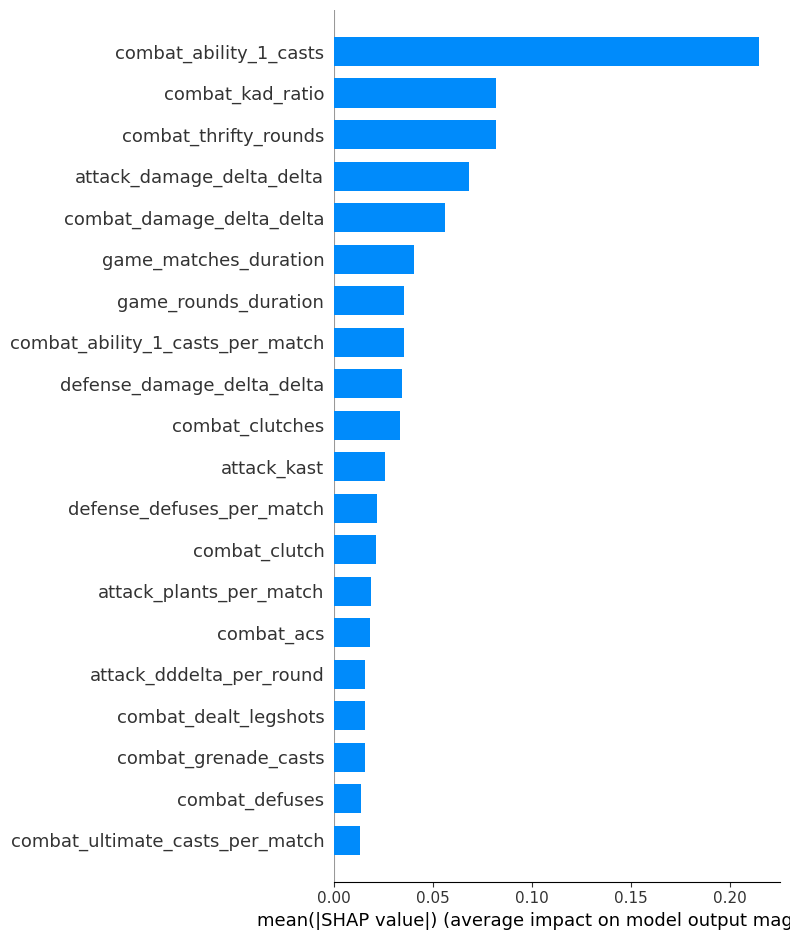

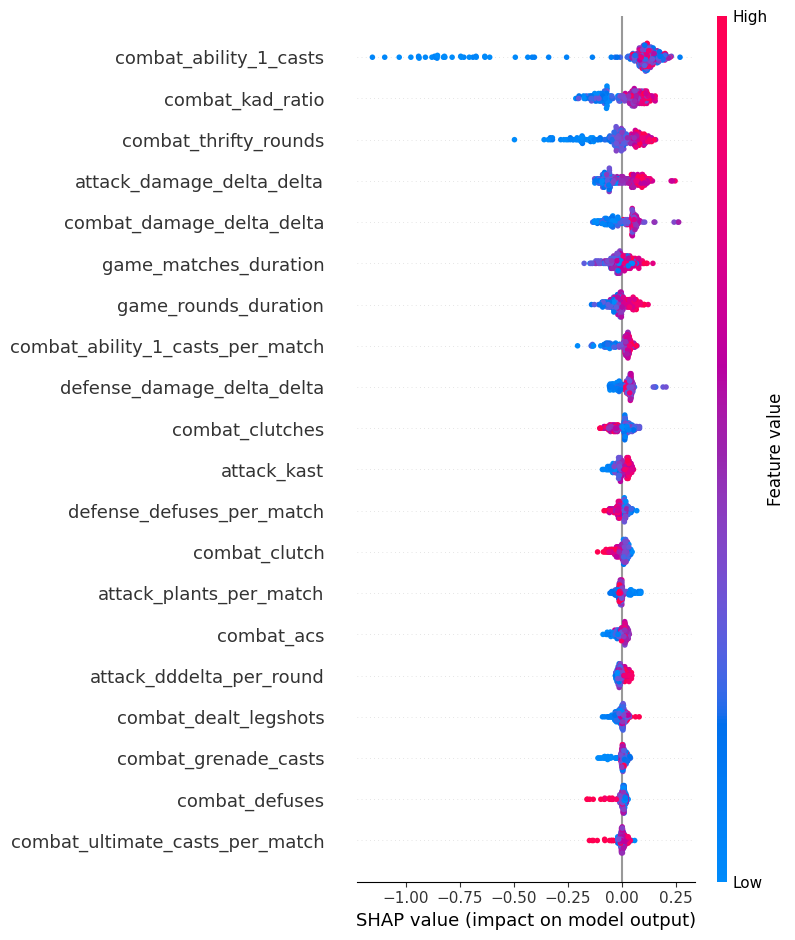

In [43]:
import shap

# Random Forest SHAP
rf_explainer = shap.TreeExplainer(best_rf)
rf_shap_values = rf_explainer.shap_values(X_train)

shap.summary_plot(rf_shap_values, X_train, max_display=20, plot_type="bar", show=True)
shap.summary_plot(rf_shap_values, X_train, max_display=20, show=True)

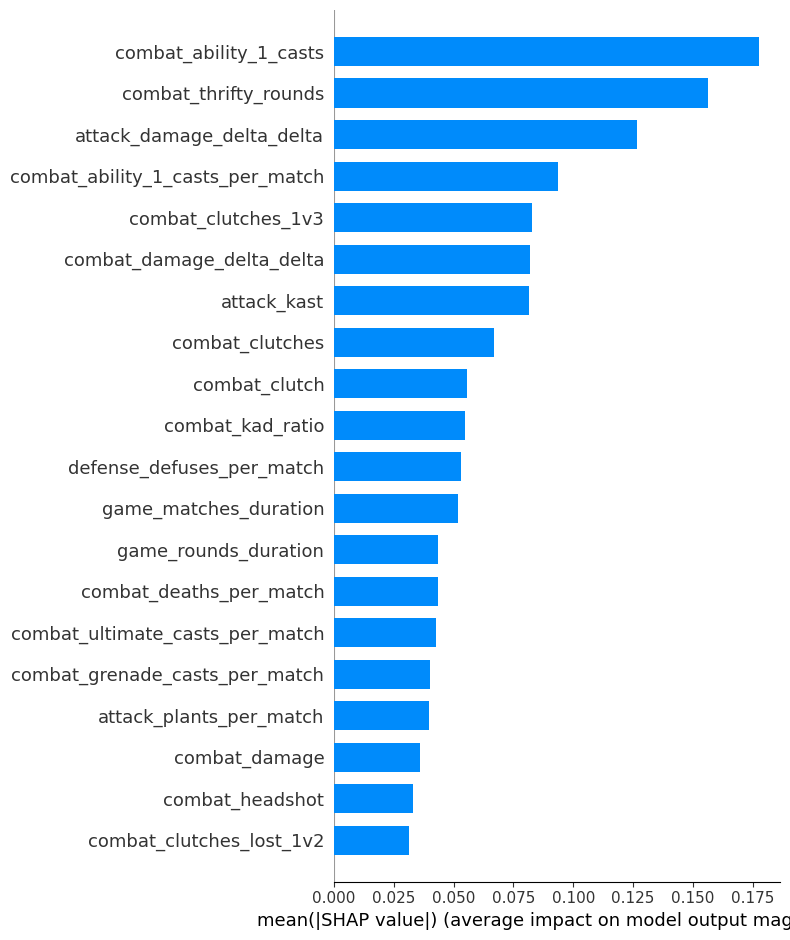

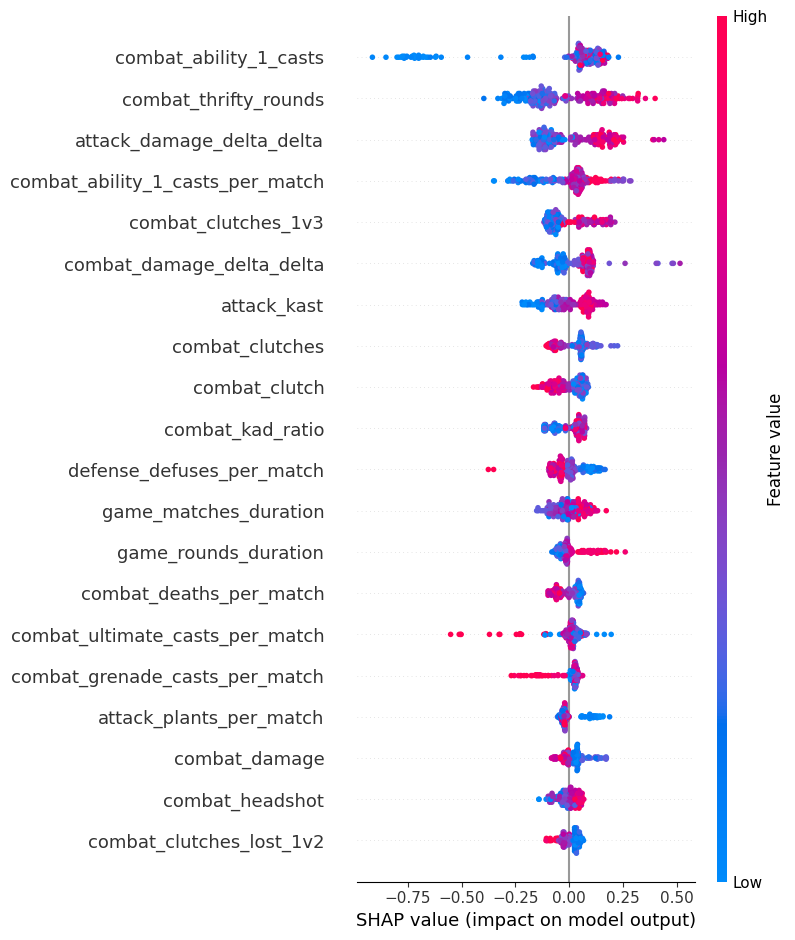

In [44]:
# XGBoost SHAP
xgb_explainer = shap.TreeExplainer(best_xgb)
xgb_shap_values = xgb_explainer.shap_values(X_train)

shap.summary_plot(xgb_shap_values, X_train, max_display=20, plot_type="bar", show=True)
shap.summary_plot(xgb_shap_values, X_train, max_display=20, show=True)

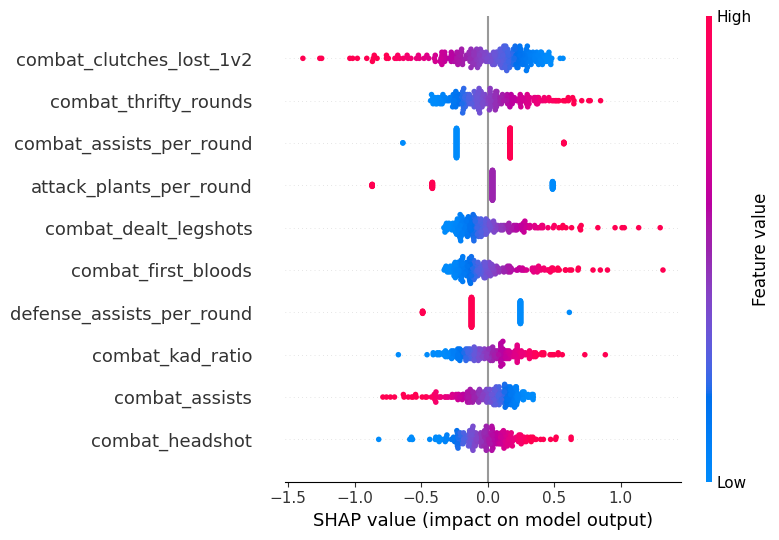

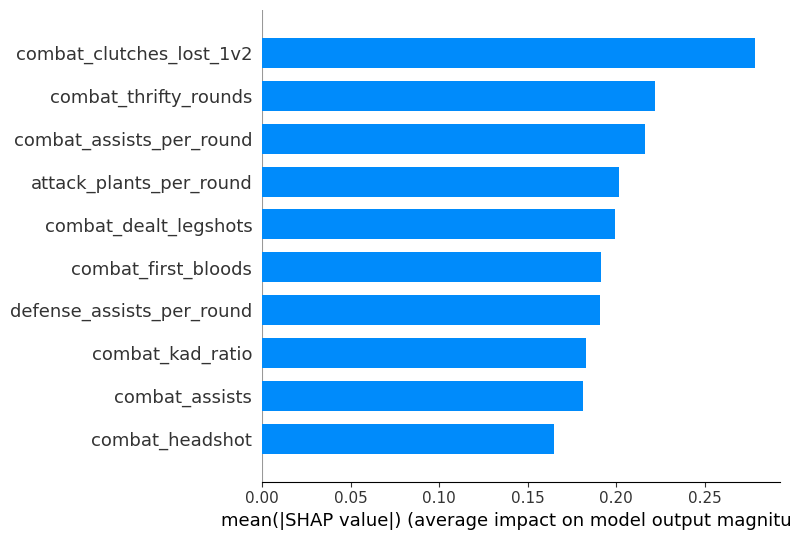

In [45]:
# Ridge
shap_linear = shap.Explainer(ridge, X_train)  
shap_values_linear = shap_linear(X_train)

shap.summary_plot(shap_values_linear, X_train, max_display=10)
shap.summary_plot(shap_values_linear, X_train, max_display=10, plot_type="bar", show=True)

Note that the graphs above represent the feature importances of the best performing model out of the four trained and tested (Ridge Regression). There are definitely some interesting variables/relationships here (like defense assists per round negatively affecting RR!).

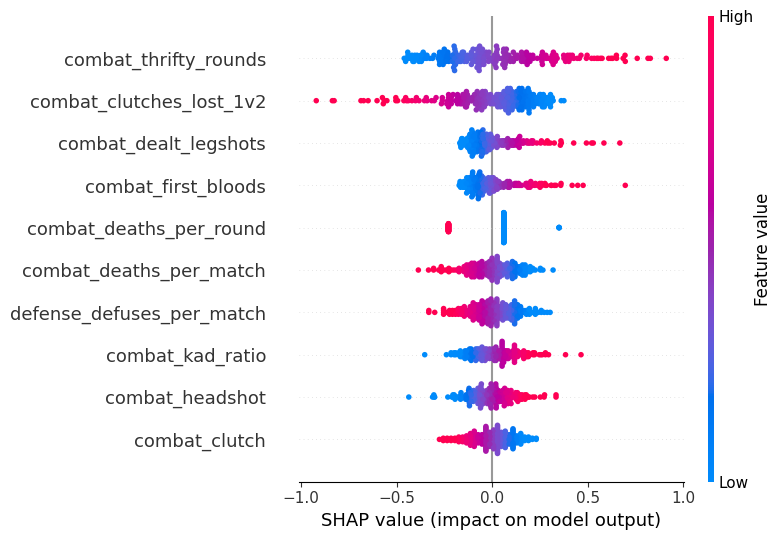

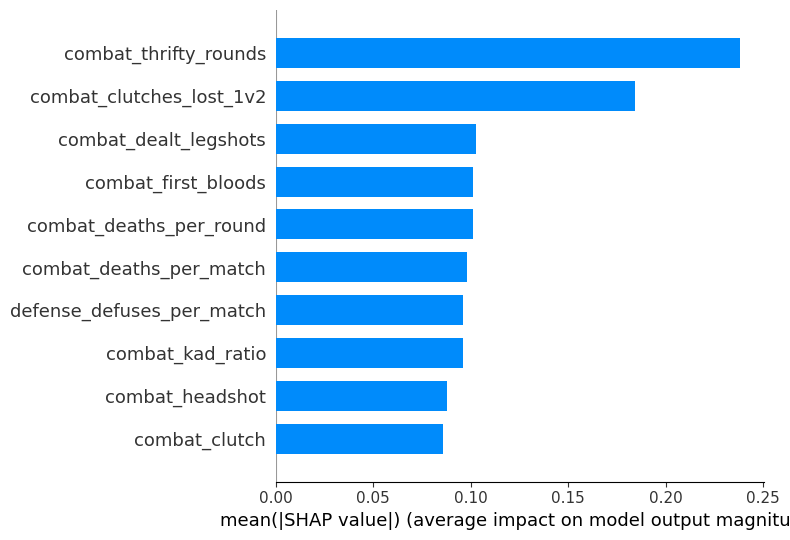

In [46]:
# Lasso
shap_linear = shap.Explainer(lasso, X_train)  
shap_values_linear = shap_linear(X_train)

shap.summary_plot(shap_values_linear, X_train, max_display=10)
shap.summary_plot(shap_values_linear, X_train, max_display=10, plot_type="bar", show=True)

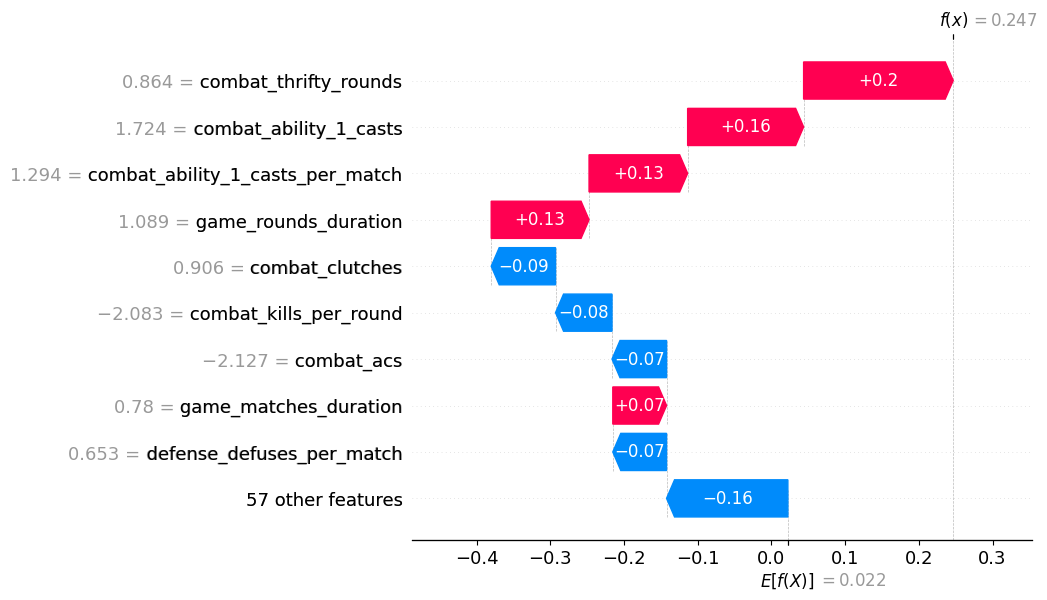

In [47]:
# Waterfall plot to observe a specific player! (play around with later)
xgb_explainer = shap.Explainer(best_xgb, X_train)  # or best_rf
xgb_shap_values = xgb_explainer(X_test)

shap.plots.waterfall(xgb_shap_values[0])

##### Game Win % as Target Variable

In [48]:
# 1. Define X and y
X = filtered_df.drop(
    ["rank_rating", "uncategorized_peak_rating", "game_win", "game_round_win", "defense_round_win", "attack_round_win", "uncategorized_performance_score", "combat_ability_1_casts", "combat_ability_2_casts"], 
    axis=1
)
y = filtered_df["game_win"]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420) #blazeit

In [49]:
# Lasso (L1)
lasso = LassoCV(cv=5, random_state=420)
lasso.fit(X_train, y_train)
lasso_importance = pd.Series(lasso.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Ridge (L2)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
ridge_importance = pd.Series(ridge.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Random Forest
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# XGB
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1]
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), xgb_params, cv=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
xgb_importance = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

/opt/miniconda3/envs/valorant/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14781576844475097, tolerance: 0.019828094521975606
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/valorant/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.39318141832933406, tolerance: 0.019828094521975606
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/valorant/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6023411109606798, tolerance: 0.019828094521975606
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/valorant/li

In [50]:
# Test models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    print(f"📊 {name} Test Performance:")
    print(f"  R²:   {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print("-" * 40)

evaluate_model(lasso, X_test, y_test, "LASSO")
evaluate_model(ridge, X_test, y_test, "Ridge")
evaluate_model(best_rf, X_test, y_test, "Random Forest")
evaluate_model(best_xgb, X_test, y_test, "XGBoost")

📊 LASSO Test Performance:
  R²:   0.5517
  RMSE: 0.61
  MAE:  0.50
----------------------------------------
📊 Ridge Test Performance:
  R²:   0.5785
  RMSE: 0.60
  MAE:  0.46
----------------------------------------
📊 Random Forest Test Performance:
  R²:   0.6018
  RMSE: 0.58
  MAE:  0.46
----------------------------------------
📊 XGBoost Test Performance:
  R²:   0.6158
  RMSE: 0.57
  MAE:  0.46
----------------------------------------


Using game win % as the target variable, our XGBoost model performed the best.

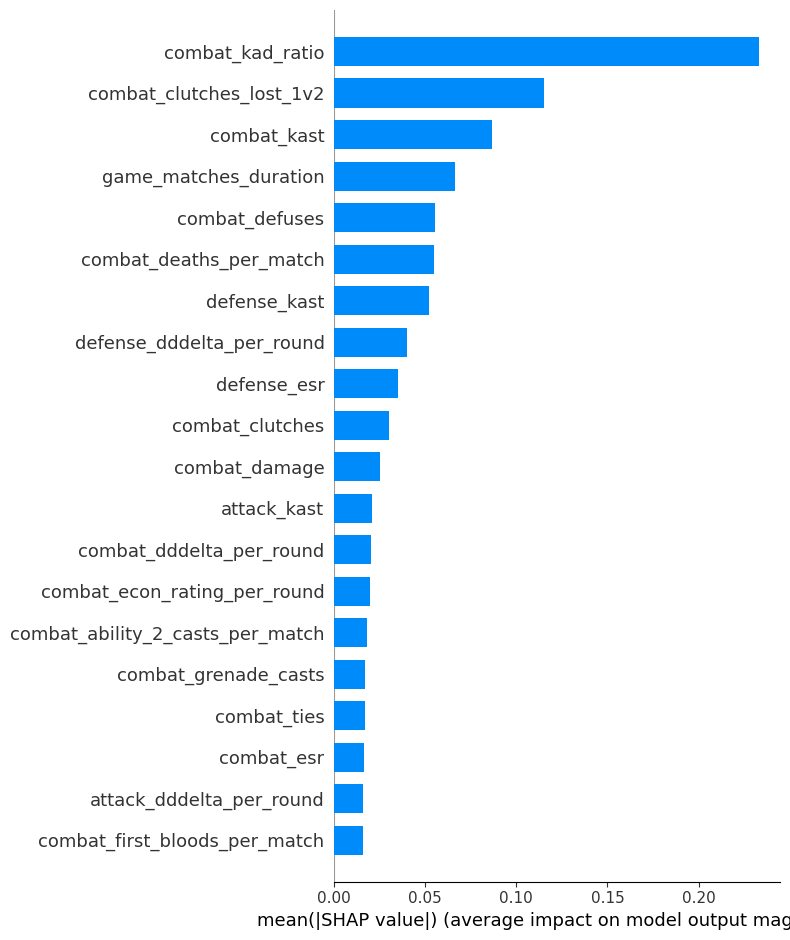

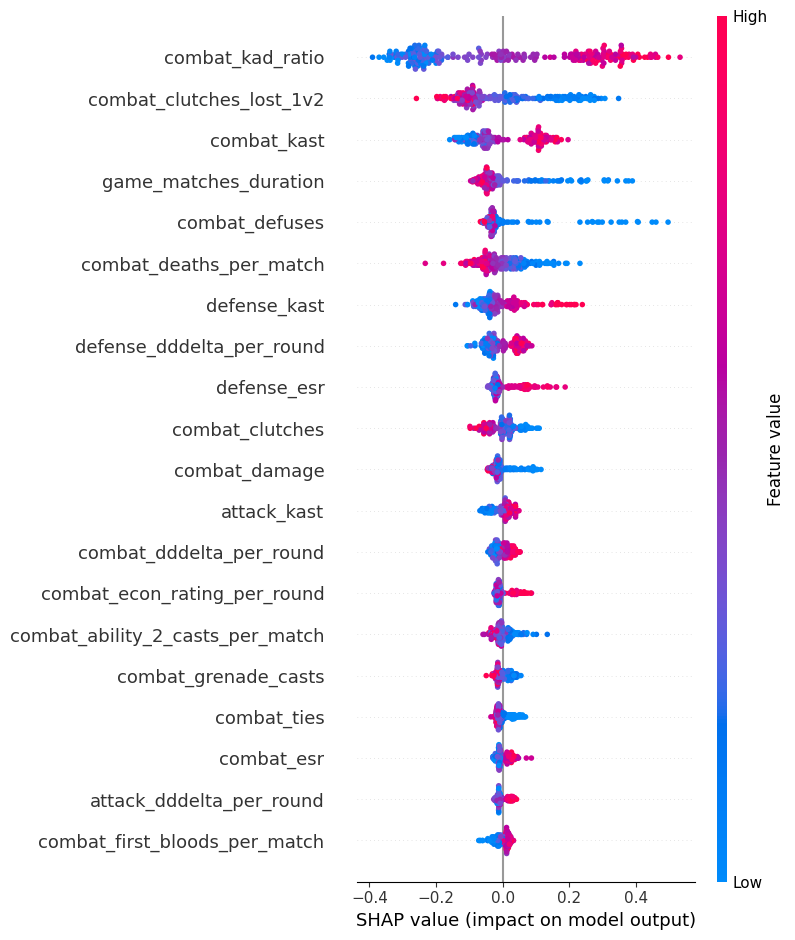

In [51]:
# Random Forest SHAP
rf_explainer = shap.TreeExplainer(best_rf)
rf_shap_values = rf_explainer.shap_values(X_train)

shap.summary_plot(rf_shap_values, X_train, max_display=20, plot_type="bar", show=True)
shap.summary_plot(rf_shap_values, X_train, max_display=20, show=True)

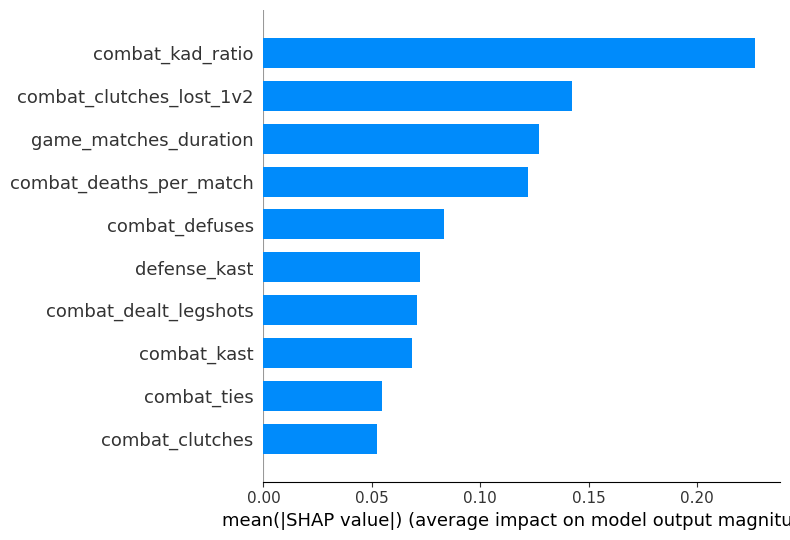

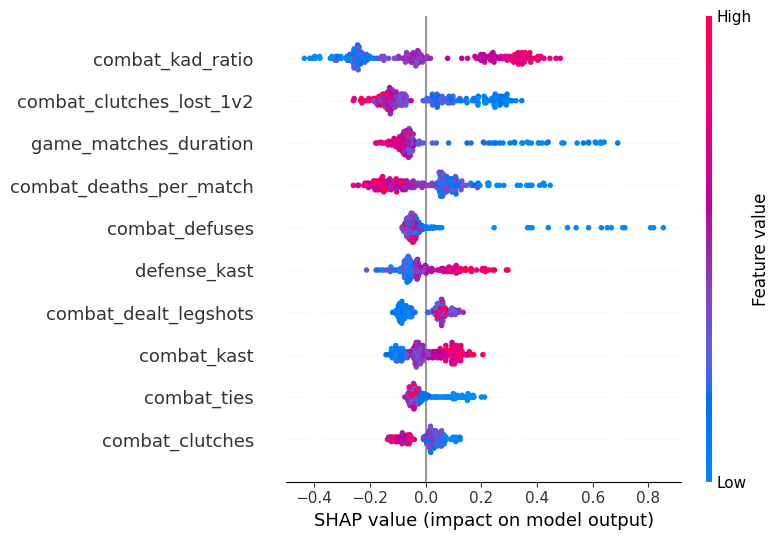

In [52]:
# XGB explainer
xgb_explainer = shap.TreeExplainer(best_xgb)
xgb_shap_values = xgb_explainer.shap_values(X_train)

shap.summary_plot(xgb_shap_values, X_train, max_display=10, plot_type="bar", show=True)
shap.summary_plot(xgb_shap_values, X_train, max_display=10, show=True)

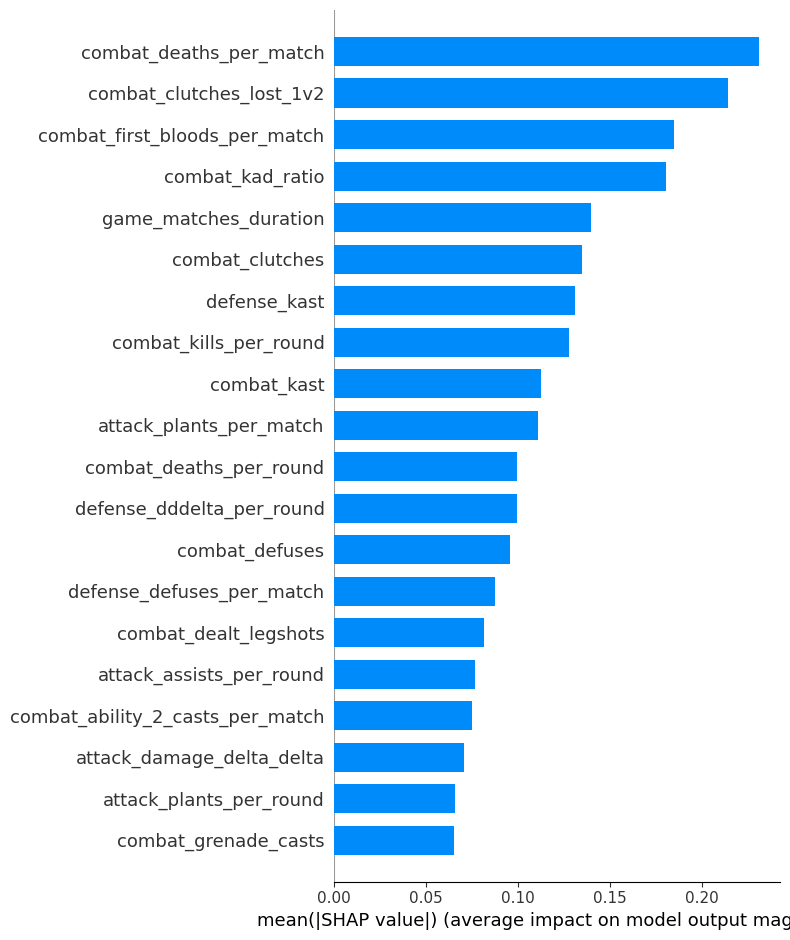

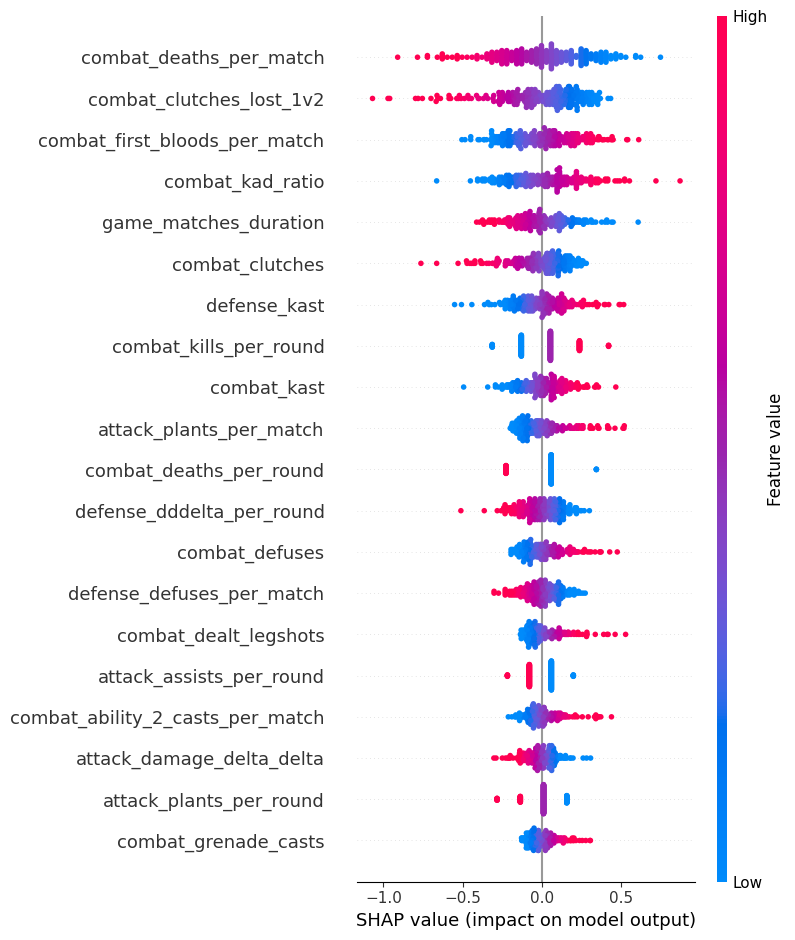

In [53]:
# Ridge
shap_linear = shap.Explainer(ridge, X_train)  
shap_values_linear = shap_linear(X_train)

shap.summary_plot(shap_values_linear, X_train, max_display=20, plot_type="bar", show=True)
shap.summary_plot(shap_values_linear, X_train, max_display=20)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

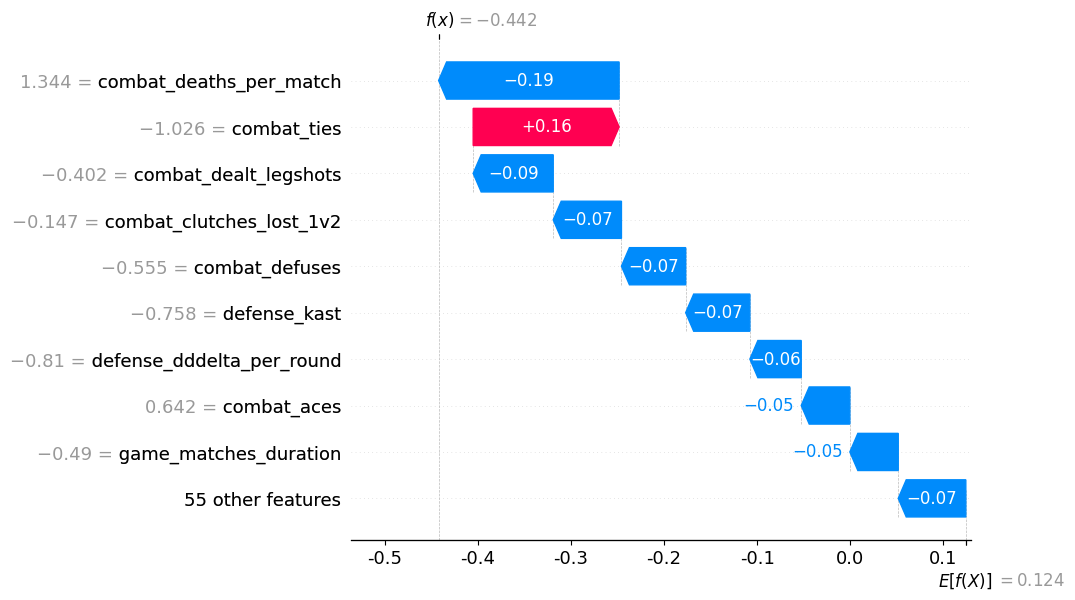

In [69]:
# Waterfall plot to observe a specific player! (play around with later)
xgb_explainer = shap.Explainer(best_xgb, X_train)  
xgb_shap_values = xgb_explainer(X_test, check_additivity=False)

shap.plots.waterfall(xgb_shap_values[1])

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

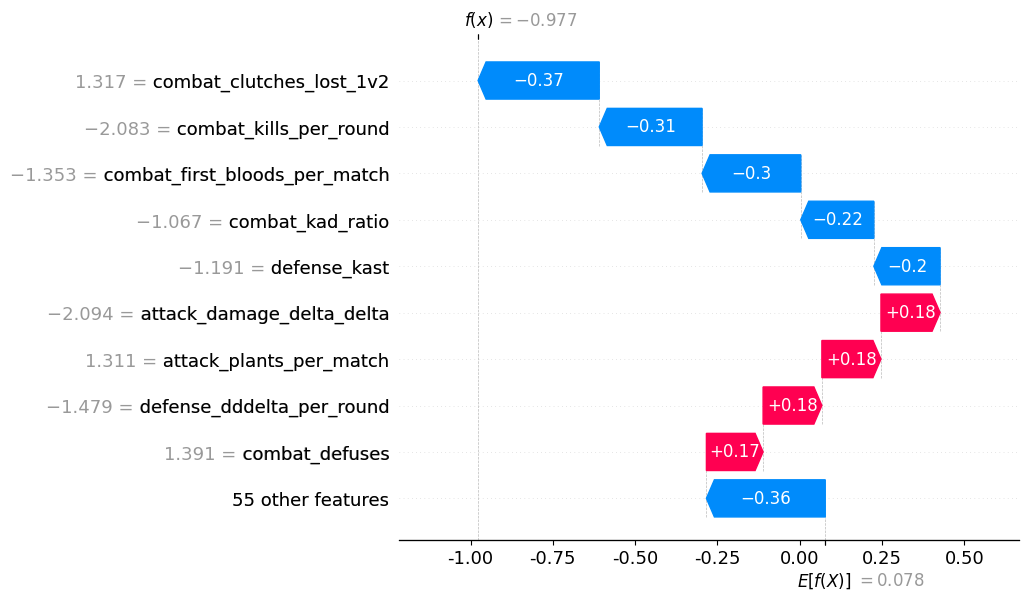

In [70]:
# Waterfall plot to observe a specific player! (play around with later)
ridge_explainer = shap.Explainer(ridge, X_train)  
ridge_shap_values = ridge_explainer(X_test)

shap.plots.waterfall(ridge_shap_values[0])

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

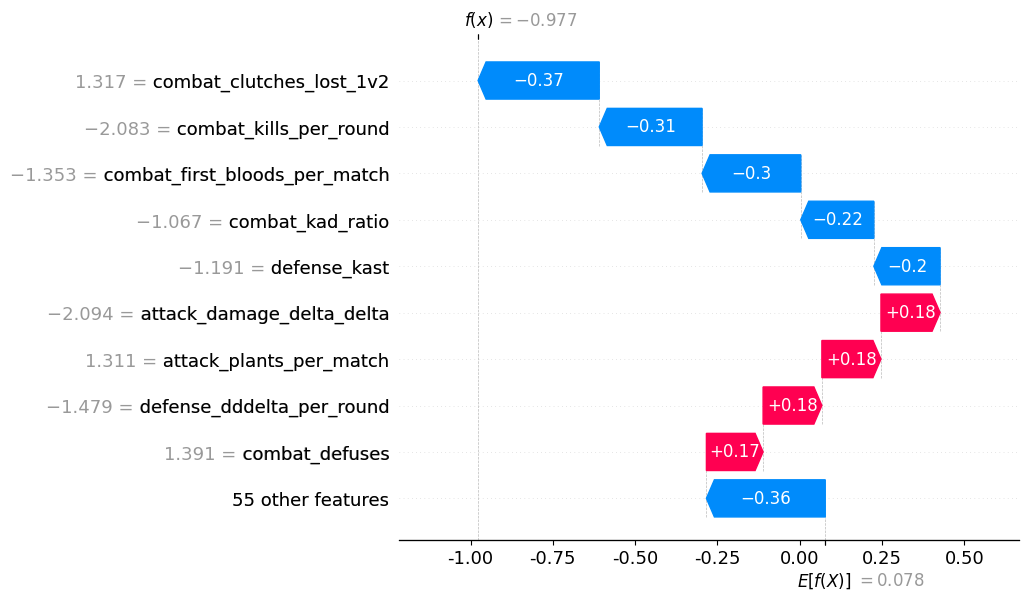

In [71]:
# Waterfall plot to observe SEN Nightz
shap.plots.waterfall(ridge_shap_values[0])

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

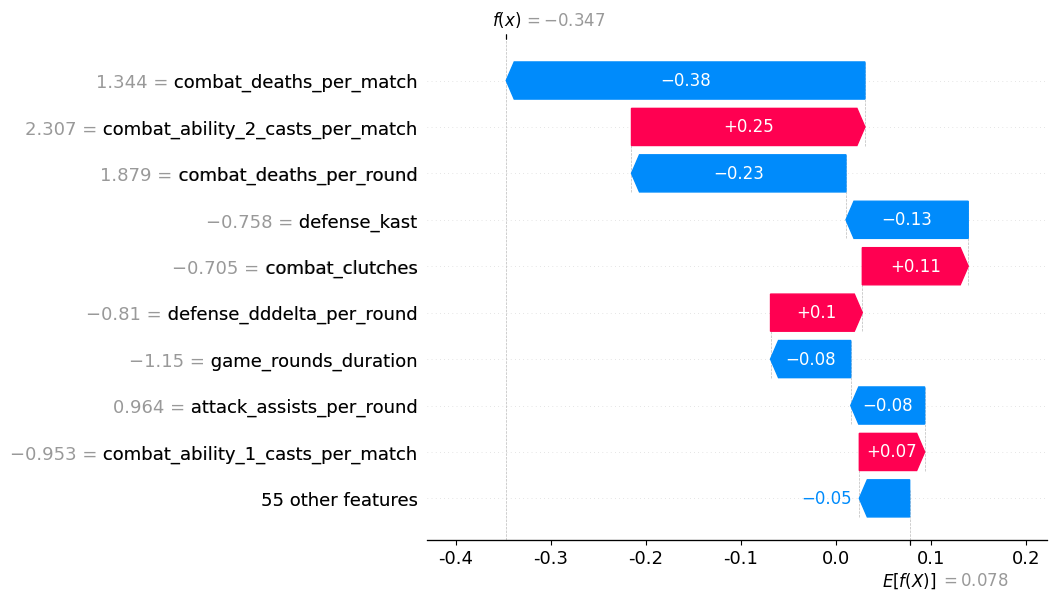

In [72]:
# Waterfall plot to observe Mooda
shap.plots.waterfall(ridge_shap_values[1])

In [73]:
# 1. Get importances from Ridge and Random Forest
ridge_importance = pd.Series(ridge.coef_, index=X.columns)
rf_importance = pd.Series(best_rf.feature_importances_, index=X.columns)

# 2. Normalize both
ridge_norm = ridge_importance.abs() / ridge_importance.abs().sum()
rf_norm = rf_importance / rf_importance.sum()

# 3. Combine by average
combined_importance = (ridge_norm + rf_norm) / 2

# 4. Sort descending
combined_importance = combined_importance.sort_values(ascending=False)

combined_importance.head(10)

combat_kad_ratio                 0.122504
combat_clutches_lost_1v2         0.073155
combat_kast                      0.050030
combat_deaths_per_match          0.048361
combat_defuses                   0.043350
game_matches_duration            0.042724
defense_kast                     0.038738
combat_clutches                  0.029941
combat_first_bloods_per_match    0.028349
defense_dddelta_per_round        0.024972
dtype: float64

In [74]:
combined_importance.head(20)

combat_kad_ratio                    0.122504
combat_clutches_lost_1v2            0.073155
combat_kast                         0.050030
combat_deaths_per_match             0.048361
combat_defuses                      0.043350
game_matches_duration               0.042724
defense_kast                        0.038738
combat_clutches                     0.029941
combat_first_bloods_per_match       0.028349
defense_dddelta_per_round           0.024972
combat_ability_2_casts_per_match    0.021526
attack_plants_per_match             0.018793
defense_esr                         0.017143
combat_kills_per_round              0.016390
combat_damage                       0.016064
defense_defuses_per_match           0.015973
combat_dealt_legshots               0.015232
combat_grenade_casts                0.014740
combat_plants                       0.014392
combat_deaths_per_round             0.013418
dtype: float64

### V. Cluster Analysis

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

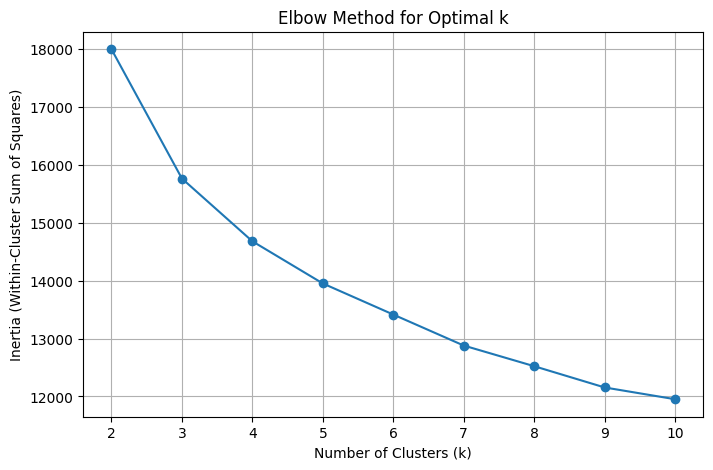

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(filtered_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [76]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(filtered_df)

# Add cluster labels to your player dataframe
clean_players["cluster"] = cluster_labels

/var/folders/g2/sqs2zsl52clglw7t6wshbl2c0000gn/T/ipykernel_53296/3841930400.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean_players["cluster"] = cluster_labels
/var/folders/g2/sqs2zsl52clglw7t6wshbl2c0000gn/T/ipykernel_53296/3841930400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_players["cluster"] = cluster_labels


In [77]:
cluster_summary = clean_players.groupby("cluster").mean(numeric_only=True)


In [78]:
print(clean_players["cluster"].value_counts())

cluster
2    134
1     98
0     60
Name: count, dtype: int64


In [79]:
from scipy.stats import zscore

z_cluster_summary = cluster_summary.apply(zscore)

In [80]:
cluster_0 = z_cluster_summary.loc[0].sort_values(ascending=False)
cluster_1 = z_cluster_summary.loc[1].sort_values(ascending=False)
cluster_2 = z_cluster_summary.loc[2].sort_values(ascending=False)

In [81]:
# Cluster 0 Features
print(cluster_0.head(10))

attack_first_bloods     1.414177
combat_multikills_3k    1.414177
combat_first_bloods     1.413967
defense_first_bloods    1.413629
attack_headshots        1.410406
combat_multikills_4k    1.410403
combat_headshots        1.409696
attack_kills            1.409401
combat_kills            1.409316
defense_kills           1.409233
Name: 0, dtype: float64


In [82]:
print(cluster_0.tail(10))

combat_ability_1_casts_per_match   -0.743787
game_win                           -0.775409
combat_headshot                    -1.040092
combat_ability_1_casts_per_round   -1.158259
defense_defuses_per_match          -1.288735
combat_grenade_casts_per_round     -1.361191
game_rounds_duration               -1.368576
combat_grenade_casts_per_match     -1.403760
combat_clutch                      -1.406672
combat_disconnects                       NaN
Name: 0, dtype: float64


In [83]:
# Cluster 1 Features
print(cluster_1.head(10))

combat_ultimate_casts_per_round    1.414214
game_round_win                     1.414154
attack_round_win                   1.413703
defense_round_win                  1.412953
game_win                           1.411939
attack_kast                        1.409325
combat_kad_ratio                   1.403591
combat_kast                        1.397627
attack_dddelta_per_round           1.397484
attack_k_per_d_ratio               1.392271
Name: 1, dtype: float64


In [84]:
print(cluster_1.tail(10))

combat_first_deaths_per_round      -1.141085
combat_plants                      -1.169527
defense_first_deaths_per_round     -1.183284
game_matches_duration              -1.267903
combat_deaths_per_match            -1.272387
attack_assists_per_round           -1.290722
combat_deaths_per_round            -1.311782
combat_ability_2_casts_per_round   -1.395352
combat_ability_2_casts_per_match   -1.409747
combat_disconnects                       NaN
Name: 1, dtype: float64


In [85]:
# Cluster 2 Features
print(cluster_2.head(15))

defense_assists_per_round           1.414128
combat_ability_1_casts_per_match    1.413568
combat_assists_per_round            1.397102
attack_plants_per_round             1.387394
attack_plants_per_match             1.359425
combat_assists_per_match            1.319376
combat_ability_1_casts_per_round    1.281858
game_matches_duration               1.176461
attack_assists_per_round            1.145888
game_rounds_duration                0.992914
combat_ability_2_casts_per_round    0.897038
combat_ability_2_casts_per_match    0.802140
combat_clutch                       0.577025
combat_grenade_casts_per_match      0.553241
combat_grenade_casts_per_round      0.348378
Name: 2, dtype: float64


In [86]:
print(cluster_2.tail(15))

defense_kills_per_round           -1.253634
combat_kills_per_match            -1.255570
defense_acs                       -1.283434
combat_score_per_match            -1.294036
combat_most_kills_match           -1.319542
uncategorized_peak_rating         -1.325376
combat_first_bloods_per_round     -1.365402
attack_damage_delta_delta         -1.384581
defense_first_bloods_per_round    -1.401341
combat_first_bloods_per_match     -1.404518
combat_ultimate_casts_per_match   -1.407163
attack_first_bloods_per_round     -1.408186
rank_rating                       -1.410269
uncategorized_rating              -1.410269
combat_disconnects                      NaN
Name: 2, dtype: float64


In [87]:
cluster_label_map = {
    0: "All Aim, No Brain",
    1: "Balanced",
    2: "Support"
}

# Add a new column for the labeled cluster
clean_players["cluster_label"] = clean_players["cluster"].map(cluster_label_map)


/var/folders/g2/sqs2zsl52clglw7t6wshbl2c0000gn/T/ipykernel_53296/1901591191.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean_players["cluster_label"] = clean_players["cluster"].map(cluster_label_map)
/var/folders/g2/sqs2zsl52clglw7t6wshbl2c0000gn/T/ipykernel_53296/1901591191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_players["cluster_label"] = clean_players["cluster"].map(cluster_label_map)


In [88]:
# highlight_igns = ["Nightz", "TenZ", "Derke"]
# highlight_rows = clean_players[clean_players["ign"].isin(highlight_igns)]

# for _, row in highlight_rows.iterrows():
#     idx = row.name
#     x, y = pca_components[idx]
#     plt.scatter(x, y, color="black", edgecolors="white", s=150, marker="*", label=row["ign"])

In [89]:
clean_players[clean_players["ign"] == "Shuist#Muay"]["game_win"] # 100, 1137RR, 55.3% wr, Asia Pacific, all aim no brain
clean_players[clean_players["ign"] == "LEV ghoul33#2007"]["game_win"] # 197, 1174RR, 74.7% wr, Brazil, balanced
clean_players[clean_players["ign"] == "chinese queen#ccp"]["game_win"] # 99, 1244RR, 69.4% wr, Asia Pacific, support

clean_players[clean_players["ign"] == "Stop#BACK"]["game_win"] # 64, 970RR, 67% wr, EU, all aim no brain
clean_players[clean_players["ign"] == "최강전사미니특공대#메카니멀"] # 156, 632RR, 78.5% wr, Korea
clean_players[clean_players["ign"] == "Spectating#N1909"] # 44, 790RR, 77.3% wr, North America

ign region  rank_rating  combat_ability_1_casts  \
44  Spectating#N1909     na          790                  1382.0   

    combat_ability_1_casts_per_match  combat_ability_1_casts_per_round  \
44                             11.61                               0.6   

    combat_ability_2_casts  combat_ability_2_casts_per_match  \
44                  2502.0                             21.03   

    combat_ability_2_casts_per_round  combat_aces  ...  defense_rounds_played  \
44                               1.0          4.0  ...                 1255.0   

    defense_rounds_survived  defense_rounds_traded  defense_rounds_won  \
44                    402.0                  207.0               781.0   

    defense_score  uncategorized_peak_rating  uncategorized_performance_score  \
44       318575.0                      795.0                            867.0   

    uncategorized_rating  cluster  cluster_label  
44                 790.0        2        Support  

[1 rows x 158 columns]

In [90]:
top_idx_per_region = clean_players.groupby("region")["rank_rating"].idxmax()
top_players_by_region = clean_players.loc[top_idx_per_region]

In [91]:
top_players_by_region[["ign", "region", "rank_rating"]]

ign region  rank_rating
99      chinese queen#ccp     ap         1244
197      LEV ghoul33#2007     br         1174
50               niwt#147     eu         1117
149  코린이유튜브구독좋아요알림설정#댓글껄쥐     kr          903
246     KLG sh0twell#moon  latam         1029
0          SEN nightz#aim     na         1126

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

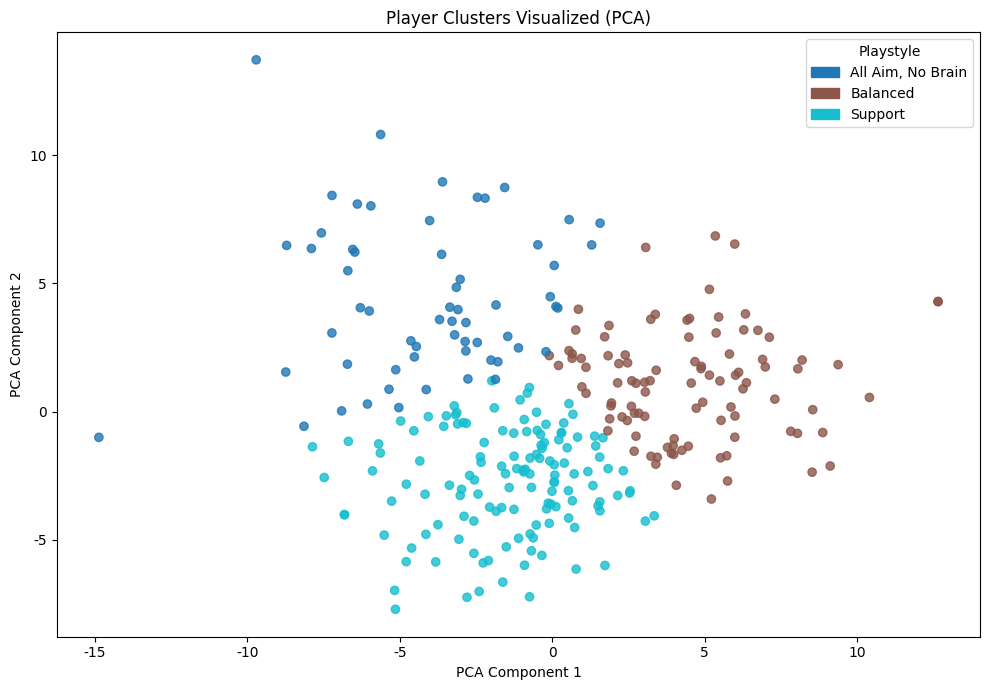

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(filtered_df)

label_names = [cluster_label_map[c] for c in cluster_labels]

# Create the plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    pca_components[:, 0],
    pca_components[:, 1],
    c=cluster_labels,
    cmap="tab10",
    alpha=0.8
)

# Add axis labels and title
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Player Clusters Visualized (PCA)")

# Custom legend instead of colorbar
import matplotlib.patches as mpatches
unique_clusters = sorted(set(cluster_labels))
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cluster_label_map[i]) for i in unique_clusters]
plt.legend(handles=handles, title="Playstyle", loc="best")

plt.tight_layout()
plt.show()

In [93]:
pca = PCA().fit(filtered_df)
print(pca.explained_variance_ratio_[:5])  # Check how much info is in PC1, PC2, PC3


[0.24245509 0.175836   0.13296708 0.06648254 0.0380231 ]


In [94]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [95]:
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(filtered_df)

# top_idx_per_region = clean_players.groupby("region")["rank_rating"].idxmax()
# top_players = clean_players.loc[top_idx_per_region]

# plt.figure(figsize=(10, 7))
# scatter = plt.scatter(
#     pca_components[:, 0],
#     pca_components[:, 1],
#     c=cluster_labels,
#     cmap="tab10",
#     alpha=0.8,
#     edgecolors="k"
# )

# for i in top_idx_per_region:
#     x, y = pca_components[i]
#     ign = clean_players.loc[i, "ign"]
#     region = clean_players.loc[i, "region"]
#     plt.scatter(x, y, color="red", marker="o", s=100, edgecolors="black", zorder=5)
#     plt.text(x - 1, y - 1, f"{ign} ({region})", fontsize=10, fontname="Malgun Gothic", fontweight="bold", color="red")

# import matplotlib.patches as mpatches
# unique_clusters = sorted(set(cluster_labels))
# handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cluster_label_map[i]) for i in unique_clusters]
# handles.append(mpatches.Patch(color="red", label="Top Player (Region)"))
# plt.legend(handles=handles, title="Playstyle", loc="best")

# # Final layout
# plt.xlabel("PCA Component 1")
# plt.ylabel("PCA Component 2")
# plt.title("Clusters with Top Players Highlighted (PCA)")
# plt.tight_layout()
# plt.show()


In [96]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

top_idx_per_region = clean_players.groupby("region")["rank_rating"].idxmax()

pca = PCA(n_components=2)
pca_components = pca.fit_transform(filtered_df)

# Base dataframe for scatter
plot_df = clean_players.copy()
plot_df["PC1"] = pca_components[:, 0]
plot_df["PC2"] = pca_components[:, 1]
plot_df["cluster_label"] = cluster_labels

# Optional: map cluster label names
plot_df["cluster_label"] = plot_df["cluster_label"].map(cluster_label_map)

# Step 1: Plot base clusters
fig = px.scatter(
    plot_df,
    x="PC1", y="PC2",
    color="cluster_label",
    hover_name="ign",
    hover_data=["rank_rating", "region", "cluster_label"],
    title="Clusters with Top Players Highlighted (PCA)",
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.D3,
    color_continuous_scale="Viridis"
)

# Step 2: Overlay top players
top_points = []

for i in top_idx_per_region:
    row = clean_players.loc[i]
    x, y = plot_df["PC1"][i], plot_df["PC2"][i]
    label = f"{row['ign']} ({row['region']})"
    top_points.append(dict(x=x, y=y, text=label))

fig.add_trace(go.Scatter(
    x=[pt["x"] for pt in top_points],
    y=[pt["y"] for pt in top_points],
    mode="markers+text",
    name="Top Player (Region)",
    text=[pt["text"] for pt in top_points],
    #hovertext=[pt["text"] for pt in top_points],     
    hoverinfo="skip",                                
    textposition="middle right",
    marker=dict(
        size=10,
        color="red",
        symbol="circle",
        #line=dict(width=2, color="black")
    ),
    textfont=dict(
        #size=10,
        #color="red",
        #family="Malgun Gothic"
    ),
))

fig.update_layout(
    width=900,
    height=700,
    legend_title="Playstyle",
    xaxis_title="PCA Component 1",
    yaxis_title="PCA Component 2",
    yaxis_scaleanchor="x",
    plot_bgcolor="white",       
    paper_bgcolor="white",
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
)

fig.show()


In [98]:
import plotly.express as px
pca_2d = PCA(n_components=2)
pca_components_2d = pca_2d.fit_transform(filtered_df)

plot_df = clean_players.copy()
plot_df["PC1"] = pca_components_2d[:, 0]
plot_df["PC2"] = pca_components_2d[:, 1]
plot_df["cluster_label"] = plot_df["cluster"].map(cluster_label_map)

fig = px.scatter(
    plot_df,
    x="PC1",
    y="PC2",
    color="cluster_label",
    #symbol="region",  # Optional: Use shape for region
    hover_name="ign",
    hover_data=["rank_rating", "region", "cluster_label"],
    title="Interactive 2D PCA - Player Clusters",
    opacity=0.8
)

fig.update_traces(marker=dict(size=8, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(legend_title_text="Playstyle")
fig.update_layout(
    width=900, height=700,  # Set square figure size
    yaxis_scaleanchor="x",  # Equal unit lengths
    #title="Interactive 2D PCA - Player Clusters"
)
fig.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

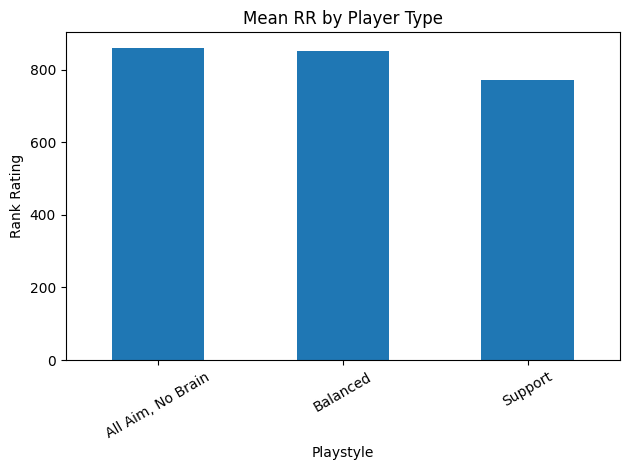

In [99]:
rr_by_label = clean_players.groupby("cluster_label")["rank_rating"].mean().sort_values(ascending=False)

rr_by_label.plot(kind="bar", title="Mean RR by Player Type", ylabel="Rank Rating", xlabel="Playstyle")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [100]:
# region_dist = (
#     clean_players.groupby("cluster_label")["region"]
#     .value_counts(normalize=True)
#     .unstack()
#     .fillna(0)
# )

# region_dist.plot(kind="bar", stacked=True, figsize=(10, 6))
# plt.title("Region Distribution by Playstyle")
# plt.ylabel("Proportion of Players")
# plt.xlabel("Playstyle")
# plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
# plt.show()


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

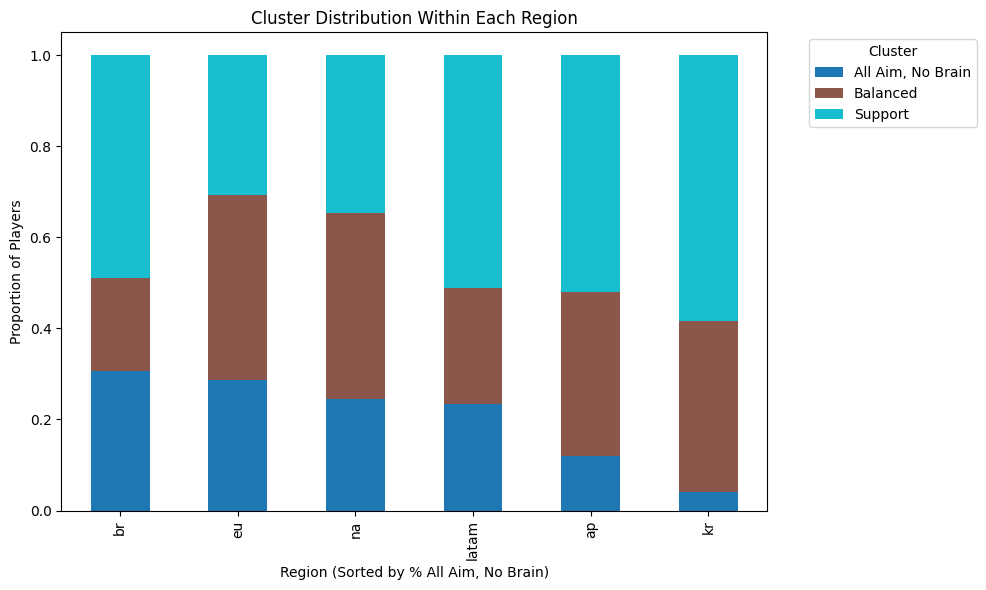

In [101]:
# Step 1: Compute cluster distribution per region
cluster_dist_per_region = (
    clean_players.groupby("region")["cluster_label"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Step 2: Sort by the "All Aim, No Brain" column in descending order
cluster_dist_per_region_sorted = cluster_dist_per_region.sort_values(by="All Aim, No Brain", ascending=False)

# Step 3: Plot
cluster_dist_per_region_sorted.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab10")
plt.title("Cluster Distribution Within Each Region")
plt.ylabel("Proportion of Players")
plt.xlabel("Region (Sorted by % All Aim, No Brain)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [102]:
import plotly.graph_objects as go
import plotly.colors

# Use the same cluster distribution DataFrame
cluster_dist_per_region_sorted = (
    clean_players.groupby("region")["cluster_label"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .sort_values(by="All Aim, No Brain", ascending=False)
)

# Get regions and clusters
regions = cluster_dist_per_region_sorted.index.tolist()
clusters = cluster_dist_per_region_sorted.columns.tolist()
colors = plotly.colors.qualitative.D3

# Create stacked bar traces
fig = go.Figure()

for i, cluster in enumerate(clusters):
    fig.add_trace(go.Bar(
        x=regions,
        y=cluster_dist_per_region_sorted[cluster],
        name=cluster,
        marker_color=colors[i % len(colors)]
    ))

# Update layout
fig.update_layout(
    barmode="stack",
    title="Cluster Distribution Within Each Region",
    xaxis_title="Region (Sorted by % All Aim, No Brain)",
    yaxis_title="Proportion of Players",
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(gridcolor="lightgray"),
    yaxis=dict(gridcolor="lightgray"),
    legend_title="Cluster",
    width=900,
    height=600
)

fig.show()


In [103]:
top_players_by_cluster = (
    clean_players
    .sort_values(by="rank_rating", ascending=False)
    .groupby("cluster_label")
    .head(5)  # top 5 in each cluster
    .reset_index(drop=True)
)

top_players_by_cluster[["cluster_label", "ign", "region", "rank_rating"]].sort_values(by="cluster_label")

cluster_label                   ign region  rank_rating
2   All Aim, No Brain           Shuist#Muay     ap         1137
5   All Aim, No Brain        SEN nightz#aim     na         1126
6   All Aim, No Brain  the chosen one#mØØda     na         1118
13  All Aim, No Brain     Liquid NINJA#mdsn     eu         1047
14  All Aim, No Brain        Fractioned#SSJ     eu         1040
1            Balanced      LEV ghoul33#2007     br         1174
3            Balanced      endoistzin#bless     ap         1135
4            Balanced        LEV blowz#2007     br         1134
7            Balanced              niwt#147     eu         1117
8            Balanced          Storrism#lft     ap         1117
0             Support     chinese queen#ccp     ap         1244
9             Support     snappyคาบบบบ#XGOD     ap         1080
10            Support             Nun#cheza     eu         1079
11            Support              은둔고수#KOR     ap         1077
12            Support     ENVY POPPIN#GUIDE     na         1066

In [104]:
top_players_by_cluster_label = (
    clean_players
    .sort_values(by="game_win", ascending=False)
    .groupby("cluster_label")
    .head(5)  # top 5 in each cluster_label
    .reset_index(drop=True)
)

top_players_by_cluster_label[["cluster_label", "ign", "region", "game_win"]].sort_values(by="cluster_label").reset_index()

index      cluster_label                   ign region  game_win
0      10  All Aim, No Brain             Stop#BACK     eu     0.670
1      11  All Aim, No Brain             netto#lol     eu     0.659
2      12  All Aim, No Brain        SEN nightz#aim     na     0.640
3      13  All Aim, No Brain           lucas#fonem     na     0.635
4      14  All Aim, No Brain  poppinsguide com#BUY     na     0.635
5       0           Balanced        최강전사미니특공대#메카니멀     kr     0.785
6       1           Balanced     mapnxcuteit#ezxit     kr     0.780
7       2           Balanced        EG supamen#612     na     0.779
8       3           Balanced         KC Elite#BLUE     eu     0.775
9       4           Balanced         KRÜ Shyy#Flow     na     0.775
10      5            Support      Spectating#N1909     na     0.773
11      6            Support     snappyคาบบบบ#XGOD     ap     0.729
12      7            Support     chinese queen#ccp     ap     0.694
13      8            Support     ENVY POPPIN#GUIDE     na     0.692
14      9            Support       호이요요요용호호호#호호호호호     kr     0.687

### VI. Comparing My Friends and I to Top Radiants

In [105]:
# Raw list of friends with their usernames, tags, and region
raw_friends = [
    "stochastic#t4r0 na",
    "GV Stimulated#STIMD na",
    "fronto pronto#shai na",
    "Fairy#NA2 na",
    "JayBlrdy#bella na",
    "unsane#sybau na"
]

# Split each entry into username, tag, region
data = []
for entry in raw_friends:
    name_tag, region = entry.rsplit(" ", 1)
    username, tag = name_tag.split("#")
    data.append({"username": username.strip(), "tag": tag.strip(), "region": region.strip()})

# Create DataFrame
friends_df = pd.DataFrame(data)
print(friends_df)


        username    tag region
0     stochastic   t4r0     na
1  GV Stimulated  STIMD     na
2  fronto pronto   shai     na
3          Fairy    NA2     na
4       JayBlrdy  bella     na
5         unsane  sybau     na


In [106]:
# export csv
# friends_df.to_csv("data/friends.csv")

In [107]:
friends_df = pd.read_csv("data/friend_data.csv")
clean_friends = standardize_column_names(friends_df)
clean_friends["game_matches_duration"] = clean_friends["game_matches_duration"].apply(time_to_seconds)
clean_friends["game_rounds_duration"] = clean_friends["game_rounds_duration"].apply(time_to_seconds)
clean_friends["combat_time_played"] = clean_friends["combat_time_played"].str.replace("h", "").astype(float)
  
non_numeric_cols = ["ign", "region"]
numeric_cols = [col for col in clean_friends.columns if col not in non_numeric_cols]
for col in numeric_cols:
    clean_friends[col] = clean_numeric_column(clean_friends[col])

quan_friends = clean_friends.drop(columns=non_numeric_cols)
scaled_data = scaler.fit_transform(quan_friends)
scaled_df = pd.DataFrame(scaled_data, columns=quan_friends.columns)

cols_to_drop = list(set(low_variance_cols).union(to_drop))
filtered_friends = scaled_df.drop(columns=cols_to_drop)

In [108]:
combined_df = pd.concat([filtered_df, filtered_friends], ignore_index=True)

# Fit KMeans on the combined data
cluster_labels_friends = kmeans.fit_predict(combined_df)

n_friends = len(filtered_friends)
friends_df["cluster"] = cluster_labels_friends[-n_friends:]

# Map to cluster label names
friends_df["cluster_label"] = friends_df["cluster"].map(cluster_label_map)

/var/folders/g2/sqs2zsl52clglw7t6wshbl2c0000gn/T/ipykernel_53296/1906043587.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/g2/sqs2zsl52clglw7t6wshbl2c0000gn/T/ipykernel_53296/1906043587.py:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [109]:
friends_df[["ign", "cluster"]]

ign  cluster
0      stochastic#t4r0        1
1  GV Stimulated#STIMD        1
2   fronto pronto#shai        2
3            Fairy#NA2        1
4       JayBlrdy#bella        2
5         unsane#sybau        1

In [116]:
import plotly.express as px
import plotly.graph_objects as go

friends_pca = pca_2d.transform(filtered_friends)

# Scatter for top players (clustered)
fig = px.scatter(
    plot_df,
    x="PC1", y="PC2",
    color="cluster_label",
    hover_name="ign",
    title="Clusters with Friends Highlighted (PCA)",
    opacity=0.8,
    color_continuous_scale="Viridis"
)

# Use previously built plot_df from original PCA
plot_df["type"] = "Top Player"
friends_plot_df = friends_df.copy()
friends_plot_df["PC1"] = friends_pca[:, 0]
friends_plot_df["PC2"] = friends_pca[:, 1]
friends_plot_df["type"] = "Friend"

# Combine
combined_plot = pd.concat([plot_df[["ign", "PC1", "PC2", "cluster_label", "type"]],
                           friends_plot_df[["ign", "PC1", "PC2", "type"]]],
                          ignore_index=True)

# Overlay friends
fig.add_trace(go.Scatter(
    x=friends_plot_df["PC1"],
    y=friends_plot_df["PC2"],
    mode="markers+text",
    name="Friend",
    marker=dict(
        size=10,
        color="red",
        #symbol="star"
    ),
    text=friends_plot_df["ign"],
    textposition="middle right",
    hoverinfo="text"
))

fig.update_layout(
    width=900, 
    height=700, 
    yaxis_scaleanchor="x",
    plot_bgcolor="white",       
    paper_bgcolor="white",
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    legend_title_text="Legend"
    )
fig.show()


In [111]:
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

SHAP breakdown for stochastic#t4r0:


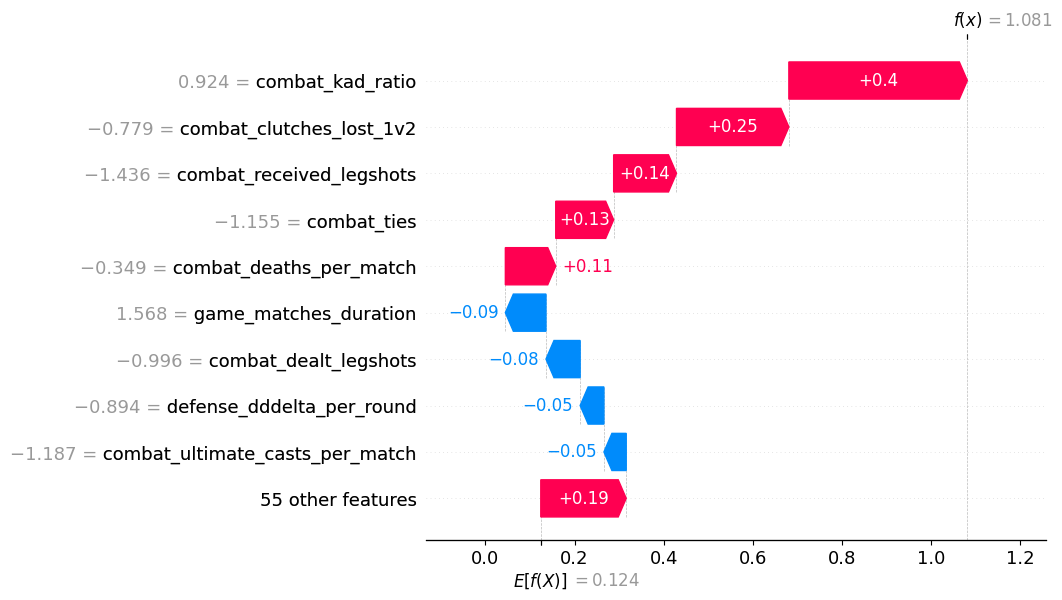

SHAP breakdown for GV Stimulated#STIMD:


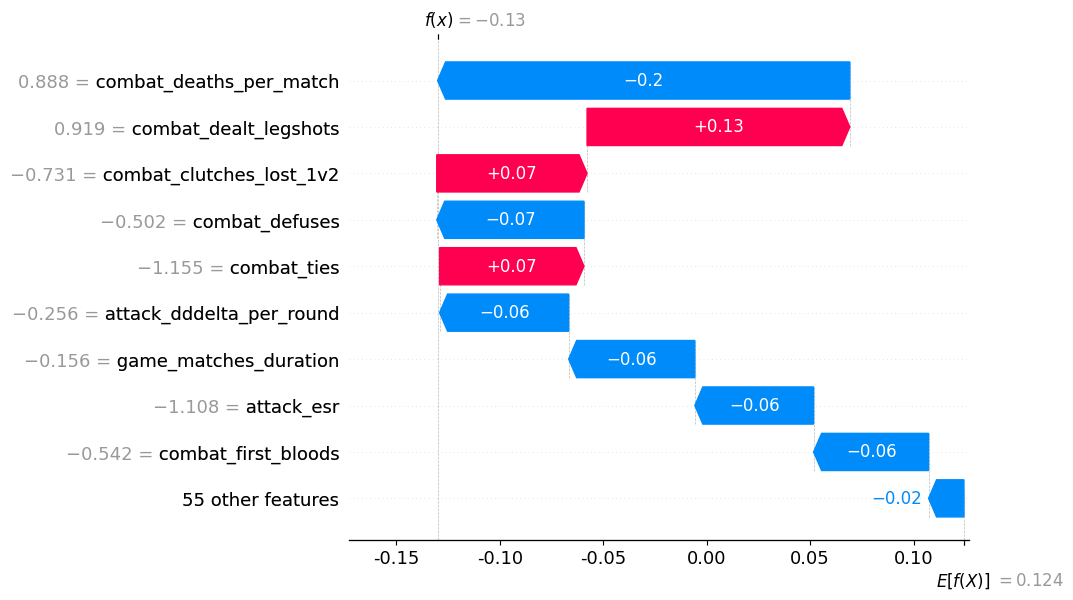

SHAP breakdown for fronto pronto#shai:


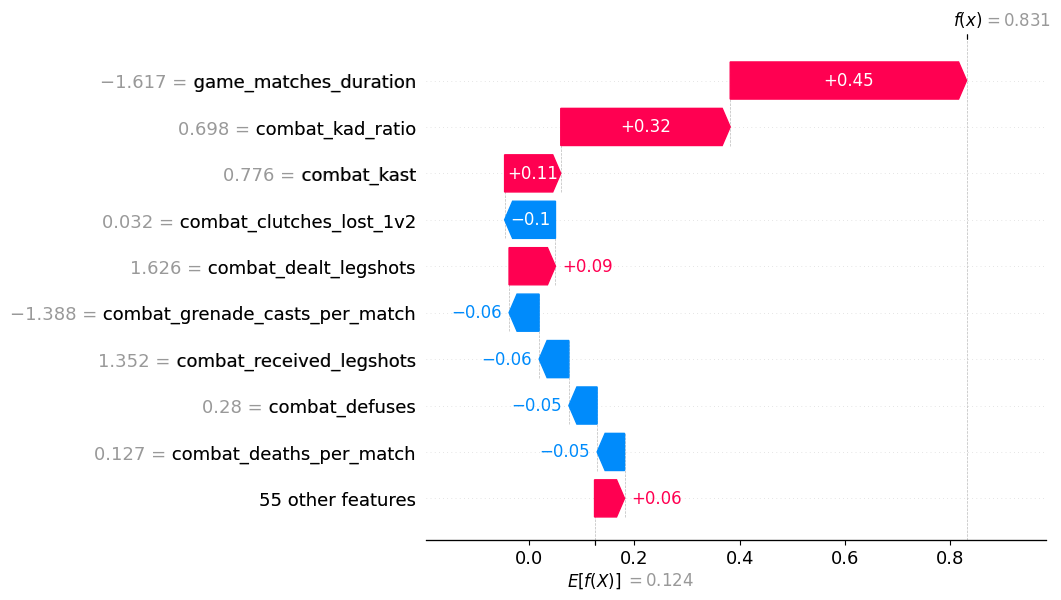

SHAP breakdown for Fairy#NA2:


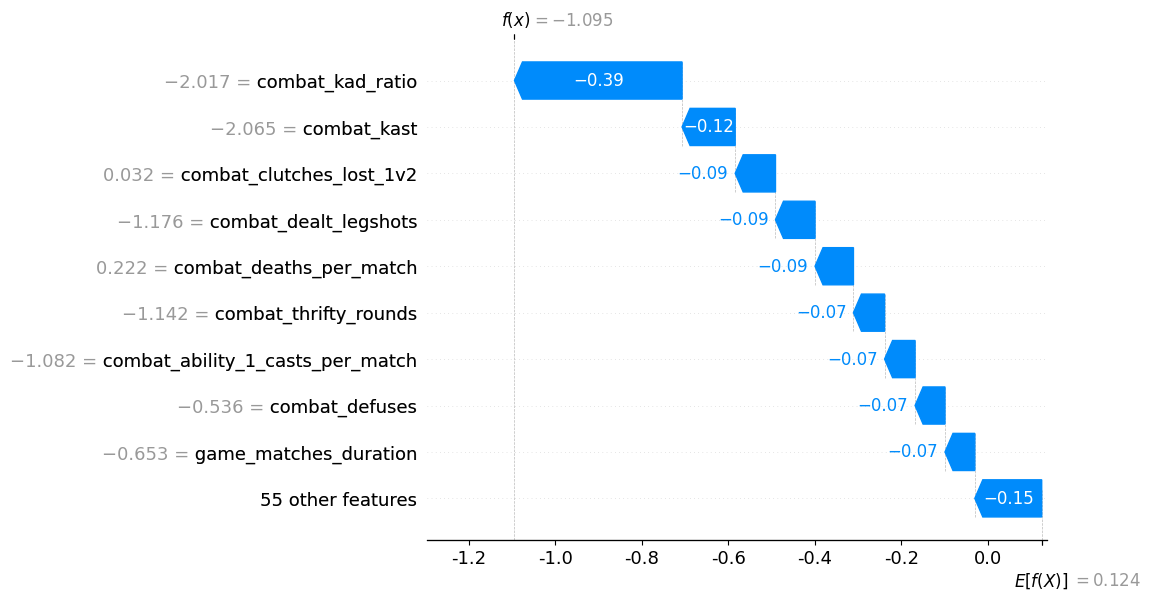

SHAP breakdown for JayBlrdy#bella:


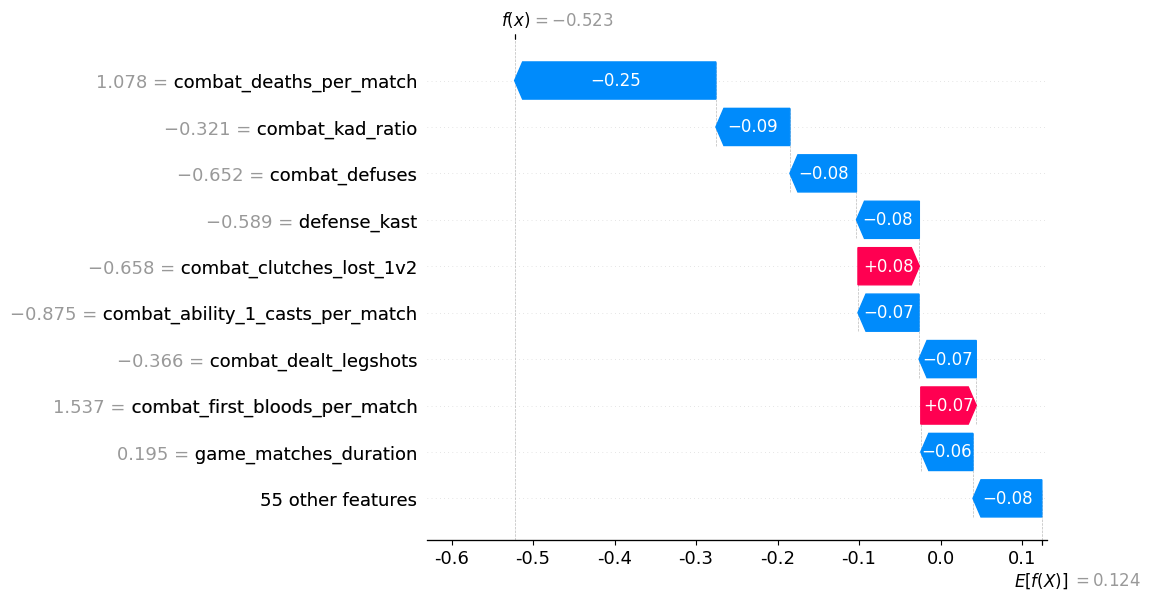

SHAP breakdown for unsane#sybau:


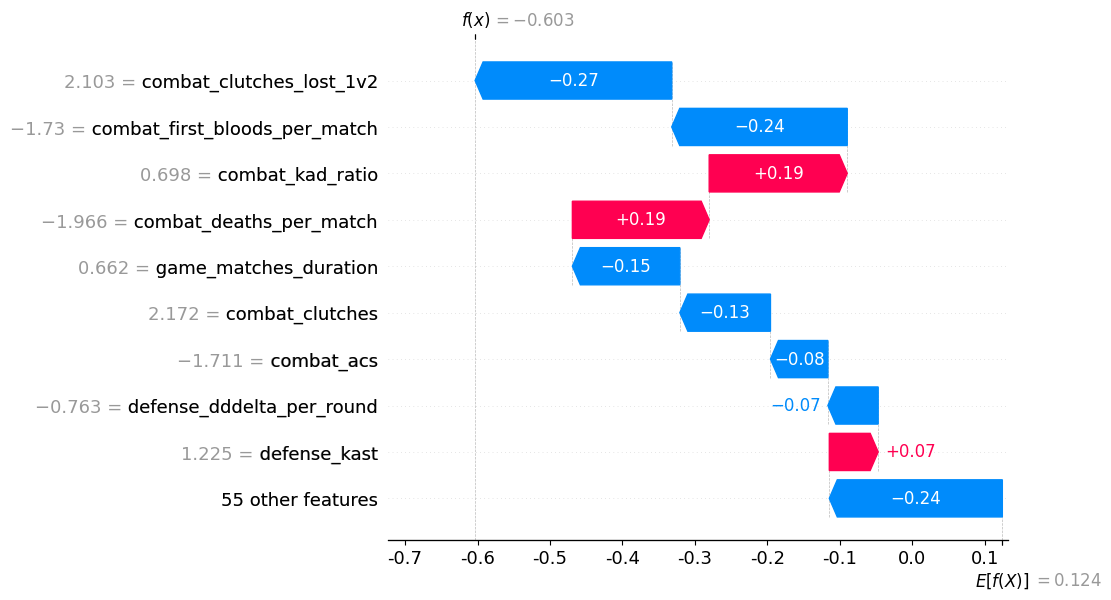

In [117]:
X_friends = filtered_friends.drop(
    ["rank_rating", "uncategorized_peak_rating", "game_win", "game_round_win", "defense_round_win", "attack_round_win", "uncategorized_performance_score", "combat_ability_1_casts", "combat_ability_2_casts"], 
    axis=1
)

friends_shap = xgb_explainer(X_friends)

for i, row in friends_df.iterrows():
    print(f"SHAP breakdown for {row['ign']}:")
    shap.plots.waterfall(friends_shap[i])

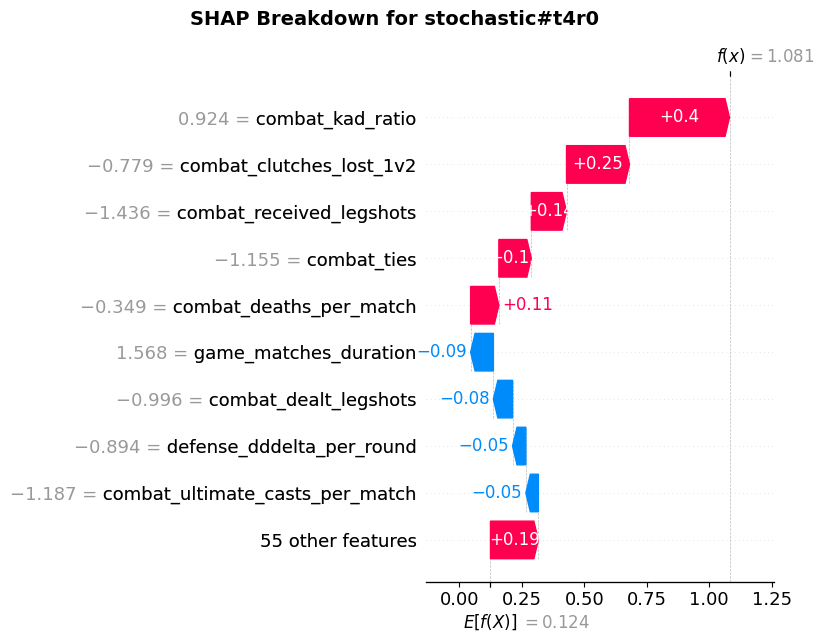

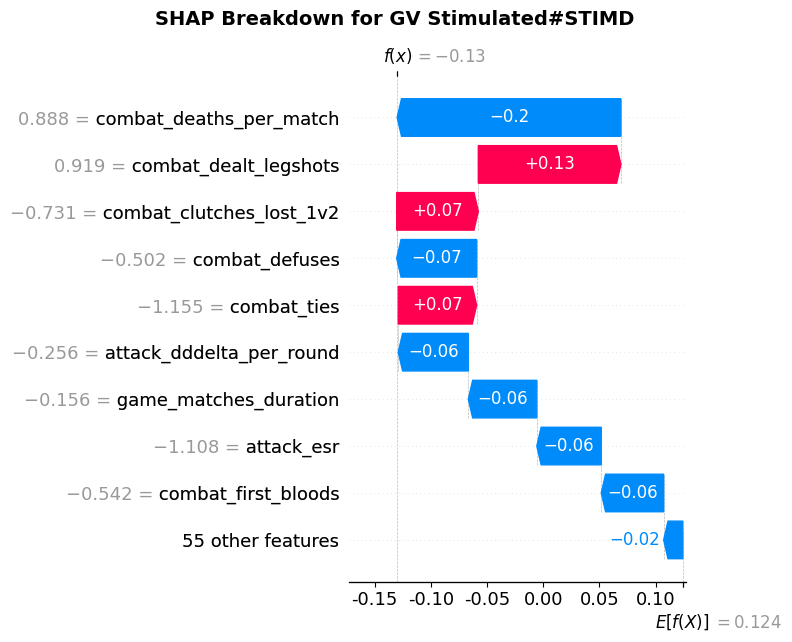

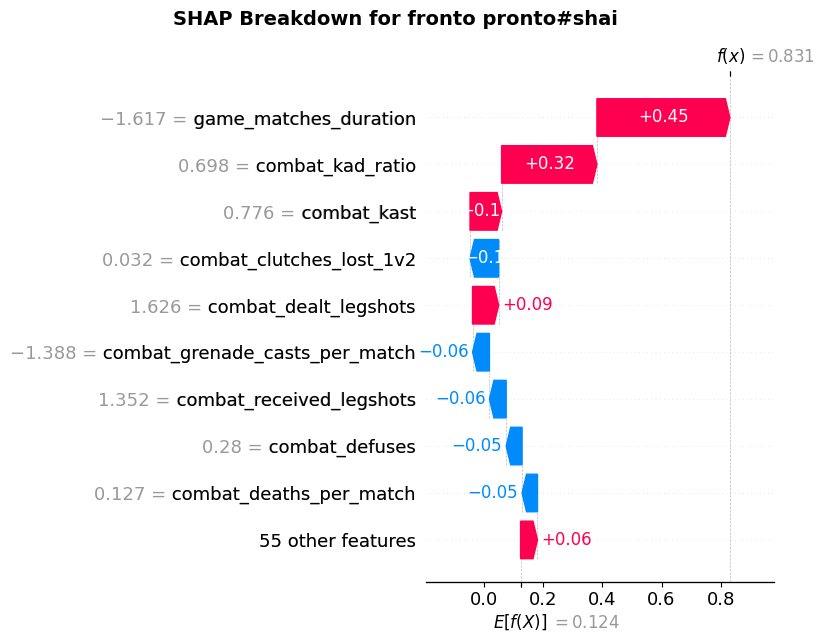

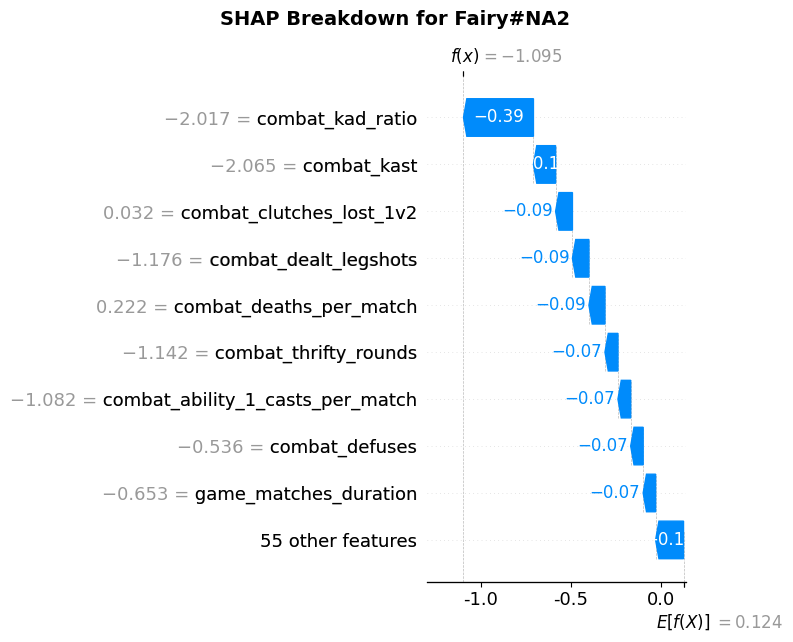

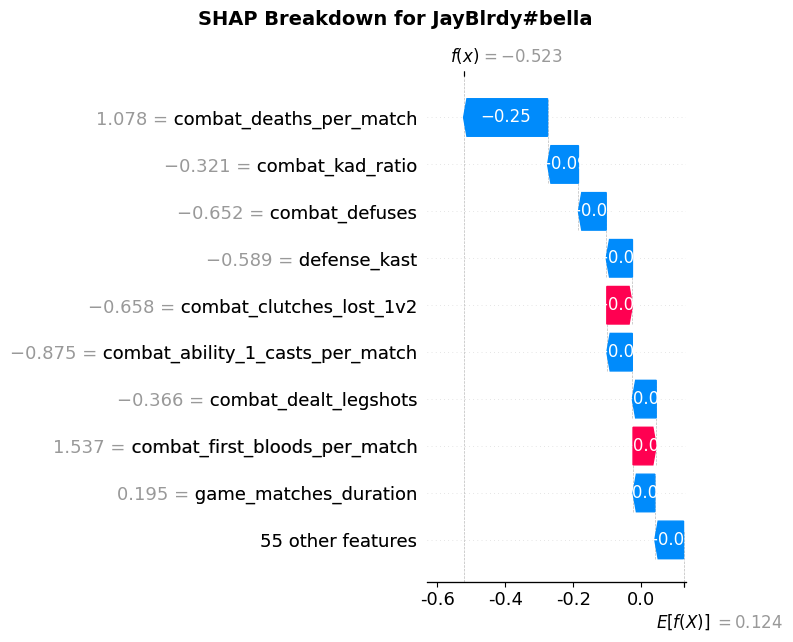

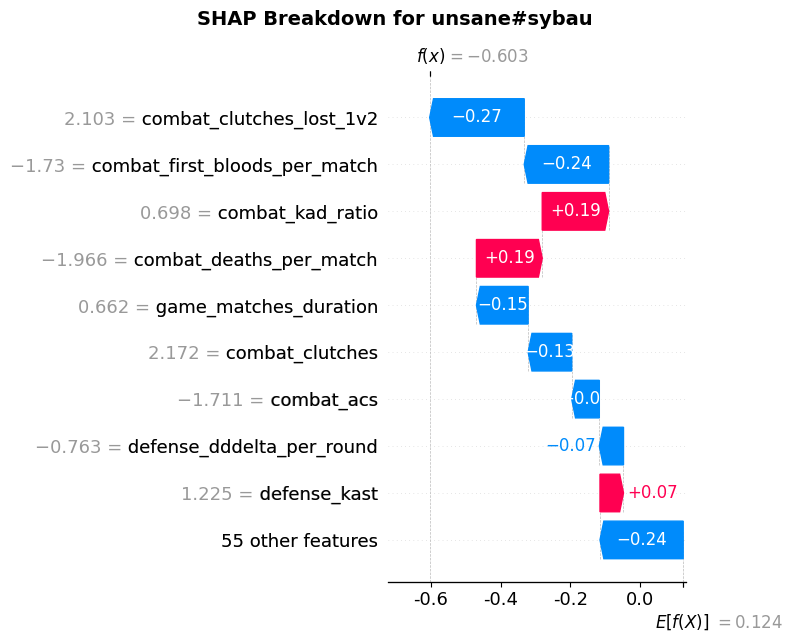

In [113]:
for i, row in friends_df.iterrows():
    shap.plots.waterfall(friends_shap[i], show=False)  # prevent SHAP from auto-displaying
    plt.gcf().suptitle(f"SHAP Breakdown for {row['ign']}", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

### VII. Misc

In [136]:
# poppinsguide com#BUYYY EP9A3 stats
kills = 3825
deaths = 3362
assists = 1517
kda = 1.36
kad = 1.59

(kills + assists) / deaths # KAD

kills / (deaths + assists) # = 0.78
(kills + deaths) / assists # = 4.74
(deaths + assists) / kills # = 1.28
assists / (kills + deaths) # = 0.21
deaths / (kills + assists) # = 0.63

(kills + 0.5 * assists) / deaths # KDA

1.3633254015466985